# Описание базы Crowdsourced Mapping

### Имеется база, содержащая 10845 записей (10545 записей, для обучения и теста и 300 записей, которые в случае необходимости используются как контрольная выборка). Каждая относится к одному из следующих классов:

- 1) Вода (water)
- 2) Ферма (farm)
- 3) Лес (forest)
- 4) Фруктовый сад (orchard)
- 5) Непроницаемая поверхность (impervious)
- 6) Трава (grass)

Каждая запись описывается 28 числовыми признаками.

Пропусков в данных нет.

Задача представляет собой задачу многоклассовой классификации. Число классов: 6.

Вся выборка описана в двух файлах формата csv (training.scv, testing.csv). Все основные операции проделываем над данными файлов по отдельности. Данные из training.csv при решении задачи разделим на обучающую и тестовую выборки, данные из testing.csv в случае необходимости будем использовать как контрольную выборку. 

# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Имеем 2 файла, подгружаем оба, смотрим все основные операции на обоих файлах, обучение и тест проводим только на 1-ом файле, 2-ой оставляем на будущее. В случае необходимости 2ой файл нами будет использован как контрольная выборка.

##### Подгружаем оба файла:

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, sep = ', ', engine='python')
data = pd.read_csv('../Untitled Folder/training.csv', engine = 'python')

In [3]:
data_2 = pd.read_csv('../Untitled Folder/testing.csv', engine = 'python')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
type(data_2)

pandas.core.frame.DataFrame

##### Смотрим на таблицы с каждого из файлов:

In [7]:
data

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0           water   997.904    637.5950    658.6680   -1882.030 -1924.36000   
1           water   914.198    634.2400    593.7050   -1625.790 -1672.32000   
2           water  3800.810   1671.3400   1206.8800     449.735  1071.21000   
3           water   952.178     58.0174  -1599.1600     210.714 -1052.63000   
4           water  1232.120     72.5180  -1220.8800     380.436 -1256.93000   
5          forest  7091.960   5102.9000   6996.7100     201.956  6130.95000   
6           water  6423.920   1585.3100   2891.6400     756.563  2978.58000   
7           water  2455.480   1136.4400   -761.0460     205.408  1647.83000   
8           water  2631.760   1116.8600   2631.7600    -408.147  1685.70000   
9           water  3192.460   1485.7700   -223.1420     727.773   180.49100   
10          water  2511.500   1302.9300   -540.3330    1977.220  1333.62000   
11          water  2833.130   1207.3400   2833.1300    -725.103  1720.86000   
12          water  2590.210   1272.6700   -567.6860    1200.170  1591.18000   
13          water  3317.610   1622.5800    369.9950   -1535.140  1911.48000   
14          water  2962.690   2250.3300    671.5990     229.826  1831.99000   
15          water  5011.310   4568.4600   5011.3100    3088.330  2260.56000   
16          water  3085.630   1267.7800   -355.4560    -103.276  -145.82200   
17          water  3721.920   1542.0100   -357.0440    -493.602  1080.80000   
18          water  3934.790   3417.0200   -250.4990     250.550    96.00030   
19          water  3715.960   1327.1200    466.4070    1681.950  -731.91500   
20          water  3505.660   1171.0800   -111.4970     593.220  -821.68600   
21          water  4065.360   2924.9700   1365.7300     575.423   651.97000   
22          water  3299.410    896.5520   1901.8800    -602.320  -404.22700   
23          water  3076.460   1925.4500   2965.9700     430.590   394.51600   
24          water  3140.210   1130.2800   2719.8200    -880.243     9.86838   
25          water  6040.450   5614.1300   4563.3900    5595.630  5748.86000   
26          water  3539.320   1722.4300    601.0570    -170.996   811.58900   
27          water  3279.630   1768.9600   2073.1300    -326.160    66.51030   
28          water  3923.730   2418.2000   1276.2600     650.845   109.14300   
29          water  3547.040   1815.9600   3539.0500    -566.926  1683.87000   
...           ...       ...         ...         ...         ...         ...   
10515        farm  7428.500   7428.5000   4676.5200    2444.440  1536.75000   
10516     orchard  7730.120   6864.4500   4817.2100    2212.300  6358.11000   
10517     orchard  7421.370   7156.4000   2857.5200    1269.900  7020.54000   
10518     orchard  7754.370   7084.0400   6294.6600    1691.400  7034.62000   
10519       grass  7699.540   5305.0600   5066.9900    3848.270  2030.59000   
10520  impervious  1870.030    802.9440     23.9029    -572.470    72.65840   
10521       grass  3788.560   3295.0100   2904.6200    2232.320  2171.32000   
10522        farm  3666.570   3264.4900   3520.6100     335.445  3107.02000   
10523  impervious  1167.760   1047.2200   1107.0400     304.138   670.79200   
10524  impervious  2768.790   2768.7900   1847.4000     548.539  1896.19000   
10525  impervious  3400.000   2934.6000   1737.1800    1465.290  1964.74000   
10526  impervious  6695.850   5964.2200   3506.3600    2572.610  2953.98000   
10527  impervious  7520.230   6668.7000   5557.0200    4841.080  4782.50000   
10528  impervious  2482.660   1882.1500   1914.6300    1484.840  1796.04000   
10529  impervious  1836.690   1223.5400    975.5840     735.491   841.06600   
10530  impervious  1806.420   1806.4200   -235.1390    -117.073  -106.60500   
10531  impervious  2177.130    967.8210    356.2100     525.036   483.05500   
10532  impervious  5319.060   5319.0600   3367.8600    3658.030  3550.13000   
10533  impervious  6722.870   6455.0400   4183.3700    6050.26

In [8]:
data_2

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0         water  2750.110   1361.8900    -247.508  -521.17300   -1123.910   
1         water  2646.250   1760.8500     481.100     6.26571     398.950   
2         water  3509.620   3509.6200    -241.320 -1239.32000    -330.388   
3         water  2820.470   2138.6900    -126.186  -522.28100    -741.163   
4         water  2684.130   1995.8000   -1029.570  1713.62000    -472.258   
5         water  2602.320   1367.1900    -381.511   439.01400    -832.624   
6         water  6010.830   5563.0900    5256.040  5355.66000    2772.670   
7         water  2963.340   2963.3400     647.065  1513.54000    1001.220   
8         water  4306.090   2084.5000     324.355    10.52640     501.750   
9         water  4004.910   2997.6800     398.745    69.39950    3037.290   
10        water  3947.330   1920.2400     266.845  -102.28300     844.944   
11        water  3885.990   2469.1100     227.908    61.42770    1775.690   
12        water  3784.810   2541.3000     276.374   -13.06340    1377.190   
13        water  3587.260   2745.9800     229.850   422.70200    1967.200   
14        water  7241.120   5506.4300    2123.040  5960.90000    5795.850   
15       forest  8072.830   8030.2000    8072.830  7801.30000    5960.230   
16       forest  7909.610   7705.3500    7503.280  6680.53000    3667.000   
17       forest  8181.920   7807.4700    7909.180  7596.59000    5044.830   
18       forest  7299.700   7003.4200    6520.690  1677.16000    3831.260   
19        grass  7505.210   7147.6700    6693.600  5771.51000    4356.040   
20       forest  7648.710   7648.7100    7548.480  7251.18000    6335.900   
21       forest  7970.680   7764.6600    7806.490  6984.44000    7416.000   
22       forest  7769.530   7769.5300    6887.720  6093.45000    5193.070   
23       forest  8035.770   7791.3100    7940.900  8035.77000    7705.380   
24        grass  7737.770   2275.2400    7287.940  6767.88000    6235.910   
25       forest  8178.340   7928.1100    7792.630  7219.16000    5773.600   
26       forest  7345.530   7345.5300    6229.800  6569.47000    6216.330   
27       forest  7991.910   7806.4100    7907.660  5732.13000    7337.880   
28       forest  8167.330   8006.6900    8012.240  6967.26000    7618.070   
29       forest  8120.720   7929.8100    8064.170  8120.72000    7828.350   
..          ...       ...         ...         ...         ...         ...   
270      forest  8206.490   7381.8500    8130.970  7724.36000    7805.980   
271      forest  8040.380   6870.0800    7401.960  6047.88000    5378.300   
272      forest  8026.920   6886.4300    7225.300  6949.79000    7021.710   
273      forest  7590.410   6713.5700    7590.410  1523.94000    5798.660   
274      forest  8222.540   6794.6200    7520.240  1884.44000    6145.390   
275  impervious  1598.600   1559.4400    1462.550   246.14000    1440.570   
276  impervious  5403.700   3372.0400    2999.900  2989.63000    3493.000   
277       grass  6727.610   5936.3100    5719.410  3049.24000    3158.050   
278       water   379.758  -2773.0900   -2683.410 -2279.25000   -2599.880   
279       water   387.999  -1888.7100   -1281.190 -2624.11000   -2828.660   
280       water   360.375  -2218.8300   -1919.960 -5774.37000   -2594.560   
281       water   419.574  -1938.8200   -1674.010 -2125.36000   -2136.200   
282       water   531.829  -2253.5700   -1753.850 -2189.94000   -2182.450   
283       water   338.410  -2223.4700     126.964 -2027.75000   -2364.180   
284       water  1160.080  -3363.6400   -1827.440 -1227.35000   -2518.180   
285       water   664.988  -1940.8800   -1431.410  -783.46400   -1919.190   
286       water   403.980  -1295.3300   -1744.310 -1670.15000   -2164.640   
287       water   873.314  -2646.4800   -1664.540  -432.73600   -3209.770   
288       water   397.932  -1714.3500   -1649.990 -2072.41000   -2145.630   
289       water   398.479  -2022.4000   -1724.350 -2116.73000   -2202.490   
290   

In [9]:
print(data)

            class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0           water   997.904    637.5950    658.6680   -1882.030 -1924.36000   
1           water   914.198    634.2400    593.7050   -1625.790 -1672.32000   
2           water  3800.810   1671.3400   1206.8800     449.735  1071.21000   
3           water   952.178     58.0174  -1599.1600     210.714 -1052.63000   
4           water  1232.120     72.5180  -1220.8800     380.436 -1256.93000   
5          forest  7091.960   5102.9000   6996.7100     201.956  6130.95000   
6           water  6423.920   1585.3100   2891.6400     756.563  2978.58000   
7           water  2455.480   1136.4400   -761.0460     205.408  1647.83000   
8           water  2631.760   1116.8600   2631.7600    -408.147  1685.70000   
9           water  3192.460   1485.7700   -223.1420     727.773   180.49100   
10          water  2511.500   1302.9300   -540.3330    1977.220  1333.62000   
11          water  2833.130   1207.3400   2833.1300 

In [10]:
print(data_2)

          class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0         water  2750.110   1361.8900    -247.508  -521.17300   -1123.910   
1         water  2646.250   1760.8500     481.100     6.26571     398.950   
2         water  3509.620   3509.6200    -241.320 -1239.32000    -330.388   
3         water  2820.470   2138.6900    -126.186  -522.28100    -741.163   
4         water  2684.130   1995.8000   -1029.570  1713.62000    -472.258   
5         water  2602.320   1367.1900    -381.511   439.01400    -832.624   
6         water  6010.830   5563.0900    5256.040  5355.66000    2772.670   
7         water  2963.340   2963.3400     647.065  1513.54000    1001.220   
8         water  4306.090   2084.5000     324.355    10.52640     501.750   
9         water  4004.910   2997.6800     398.745    69.39950    3037.290   
10        water  3947.330   1920.2400     266.845  -102.28300     844.944   
11        water  3885.990   2469.1100     227.908    61.42770    1775.690   

##### Посмотрим лишь на начало таблиц:

In [12]:
data.head()

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0  water   997.904    637.5950     658.668   -1882.030    -1924.36   
1  water   914.198    634.2400     593.705   -1625.790    -1672.32   
2  water  3800.810   1671.3400    1206.880     449.735     1071.21   
3  water   952.178     58.0174   -1599.160     210.714    -1052.63   
4  water  1232.120     72.5180   -1220.880     380.436    -1256.93   

   20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
0     997.904   -1739.990     630.087   -1628.240  ...    -921.193   
1     914.198    -692.386     707.626   -1670.590  ...    -954.719   
2     546.371    1077.840     214.564     849.599  ...    1562.210   
3     578.807   -1564.630    -858.390     729.790  ...   -1025.880   
4     515.805   -1413.180    -802.942     683.254  ...   -1813.950   

   20140525_N  20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  \
0   -1043.160   -1942.490     267.138     366.608     452.238     211.328   
1    -933.934    -625.385     120.059     364.858     476.972     220.878   
2    1566.160    2208.440    1056.600     385.203     300.560     293.730   
3     368.622   -1786.950   -1227.800     304.621     291.336     369.214   
4     155.624   -1189.710    -924.073     432.150     282.833     298.320   

   20140202_N  20140117_N  20140101_N  
0    -2203.02   -1180.190     433.906  
1    -2250.00   -1360.560     524.075  
2     2762.57     150.931    3800.810  
3    -2202.12     600.359   -1343.550  
4    -2197.36     626.379    -826.727  

[5 rows x 29 columns]

In [13]:
data_2.head()

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0  water   2750.11     1361.89    -247.508  -521.17300   -1123.910   
1  water   2646.25     1760.85     481.100     6.26571     398.950   
2  water   3509.62     3509.62    -241.320 -1239.32000    -330.388   
3  water   2820.47     2138.69    -126.186  -522.28100    -741.163   
4  water   2684.13     1995.80   -1029.570  1713.62000    -472.258   

   20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
0     2653.08   -264.4140   -456.4660     2080.85  ...     2380.00   
1     2646.25    550.9820     92.6923     2188.03  ...     2009.69   
2     1257.19   -175.1710   -294.5000    -1315.06  ...     1838.51   
3     2334.70   -207.4360    -76.9686     2820.47  ...     2098.55   
4     2526.99    -91.7429   -146.2260     2487.71  ...     2684.13   

   20140525_N  20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  \
0    1078.400    1778.030    2673.610   -178.9710    2238.580    1000.760   
1    1083.700    2029.520    1033.900    -19.6148    2183.660     927.882   
2    1538.750     846.783     965.654   -468.0240    -222.312    1124.250   
3     984.456    2239.330     593.874   1540.8800    2398.420     846.470   
4    1432.150    2174.890    1321.690   1351.5800    2381.950     870.890   

   20140202_N  20140117_N  20140101_N  
0    -81.5418    1146.260   -1566.490  
1    668.7500    1519.740    -568.973  
2   1132.9000     594.059    -993.658  
3    572.3080    1311.610   -1396.500  
4   1174.3300     991.427    -185.322  

[5 rows x 29 columns]

##### Смотрим на конец обеих таблиц:

In [14]:
data.tail()

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
10540  impervious   7579.58     6072.50     3803.14    3902.220     3897.43   
10541  impervious   2780.93     1895.68     1454.74    1265.480     1033.56   
10542  impervious   5833.76     3465.74     1283.32     413.412     4391.05   
10543  impervious   3079.31     2435.30     1444.40    1133.760     1278.74   
10544  impervious   7352.57     6941.19     1667.87    5084.780     4832.13   

       20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
10540    3767.050     3985.77     4122.54    4240.230  ...    7340.160   
10541    1930.380     1057.15     1471.60    1427.340  ...     888.408   
10542    1146.820     4473.05     1614.75     770.469  ...    5833.760   
10543     927.765     1917.04     1514.92    1685.130  ...    1686.860   
10544    1588.950     5978.19     5462.33    3068.030  ...    7352.570   

       20140525_N  20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  \
10540     5513.73     1538.24    3507.360    1099.800     461.336     406.031   
10541     2093.02     1232.11    1190.830    1441.460    1170.880    1095.000   
10542     4047.32     4515.80     433.177     277.296     744.143     315.503   
10543     2050.94     1848.10    1725.820    1935.410    2089.710     668.160   
10544     3289.86     3729.15    1994.980    3556.040    5299.900    1562.760   

       20140202_N  20140117_N  20140101_N  
10540     4652.03     2774.98     500.864  
10541     1818.65     2501.72    1247.770  
10542     3759.71     3267.17     388.346  
10543     1880.59     1614.84    1518.980  
10544     5983.13     1249.71    2424.230  

[5 rows x 29 columns]

In [15]:
data_2.tail()

class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
295  water   491.678  -1673.7400   -2514.480   -2451.190    -2738.44   
296  water   556.093    -96.8233    -412.727   -1795.400    -2363.82   
297  water   987.461  -2364.6000    -155.592   -1422.090    -1713.40   
298  water   973.953  -3004.6300   -1217.120     180.122    -1113.89   
299  water   516.427  -2975.1000   -1129.790     463.748    -5355.40   

     20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
295     64.4464    -2275.03    -2881.10 -4738.97000  ...    -2257.89   
296  -2168.1900    -2162.68    -3155.74 -4416.11000  ...    -3991.91   
297    465.6220    -2230.40    -3088.73 -5010.32000  ...    -2484.50   
298    438.4180    -2442.51    -3210.56 -3237.74000  ...    -3291.49   
299    193.5110    -2590.16    -3113.52    -2.38883  ...    -3058.23   

     20140525_N  20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  \
295    -2582.42    -1699.10    -2295.30     306.483    209.4030     221.920   
296    -2614.91    -2109.84    -2687.18   -2853.890     71.3402     -86.414   
297    -1756.08    -3820.43    -1988.23     433.852    291.8000     254.548   
298    -2018.45    -3472.65    -3109.07     511.792    369.0970     276.948   
299    -2276.18    -3335.00    -2929.19   -1007.500    271.0580     307.997   

     20140202_N  20140117_N  20140101_N  
295    -4885.15   -2630.590     356.233  
296    -5109.01     324.637   -4316.580  
297    -4259.30     412.115   -1170.750  
298    -5574.51     298.739     460.419  
299    -5453.33     307.495     417.124  

[5 rows x 29 columns]

## Описание классов и признаков

- `class` – The land cover class (impervious, farm, forest, grass, orchard, water) [note: this is the target variable to classify].
 - `max_ndvi` –  the maximum NDVI (normalized difference vegetation index) value derived from the time-series of satellite images.
 - `20150720_N - 20140101_N ` – NDVI values extracted from satellite images acquired between January 2014 and July 2015, in reverse chronological order (dates given in the format yyyymmdd).
 
This dataset was derived from geospatial data from two sources: 1) Landsat time-series satellite imagery from the years 2014-2015, and 2) crowdsourced georeferenced polygons with land cover labels obtained from OpenStreetMap. The crowdsourced polygons cover only a small part of the image area, and are used used to extract training data from the image for classifying the rest of the image. The main challenge with the dataset is that both the imagery and the crowdsourced data contain noise (due to cloud cover in the images and innaccurate labeling/digitizing of polygons).


##### Смотрим на размерности наших датасетов и изучаем названия столбцов (описание каждого выше). 

In [16]:
print(data.shape)
print(data.columns)

(10545, 29)
Index(['class', 'max_ndvi', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


In [17]:
print(data_2.shape)
print(data_2.columns)

(300, 29)
Index(['class', 'max_ndvi', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


##### Смотрим на диапазоны индексов

In [19]:
data.index

RangeIndex(start=0, stop=10545, step=1)

In [20]:
data_2.index

RangeIndex(start=0, stop=300, step=1)

##### "Вытаскиваем" из таблицы конкретные элементы:

In [21]:
data.at[2, 'max_ndvi']

3800.81

In [22]:
data_2.at[3, '20150720_N']

2138.69

##### Смотрим на конкретные столбцы (столбцы значений признаков):

In [23]:
data['max_ndvi']

0         997.904
1         914.198
2        3800.810
3         952.178
4        1232.120
5        7091.960
6        6423.920
7        2455.480
8        2631.760
9        3192.460
10       2511.500
11       2833.130
12       2590.210
13       3317.610
14       2962.690
15       5011.310
16       3085.630
17       3721.920
18       3934.790
19       3715.960
20       3505.660
21       4065.360
22       3299.410
23       3076.460
24       3140.210
25       6040.450
26       3539.320
27       3279.630
28       3923.730
29       3547.040
           ...   
10515    7428.500
10516    7730.120
10517    7421.370
10518    7754.370
10519    7699.540
10520    1870.030
10521    3788.560
10522    3666.570
10523    1167.760
10524    2768.790
10525    3400.000
10526    6695.850
10527    7520.230
10528    2482.660
10529    1836.690
10530    1806.420
10531    2177.130
10532    5319.060
10533    6722.870
10534    5318.140
10535    7762.590
10536    7250.200
10537    1589.000
10538    2178.670
10539    2

In [28]:
data_2['20150720_N']

0      1361.8900
1      1760.8500
2      3509.6200
3      2138.6900
4      1995.8000
5      1367.1900
6      5563.0900
7      2963.3400
8      2084.5000
9      2997.6800
10     1920.2400
11     2469.1100
12     2541.3000
13     2745.9800
14     5506.4300
15     8030.2000
16     7705.3500
17     7807.4700
18     7003.4200
19     7147.6700
20     7648.7100
21     7764.6600
22     7769.5300
23     7791.3100
24     2275.2400
25     7928.1100
26     7345.5300
27     7806.4100
28     8006.6900
29     7929.8100
         ...    
270    7381.8500
271    6870.0800
272    6886.4300
273    6713.5700
274    6794.6200
275    1559.4400
276    3372.0400
277    5936.3100
278   -2773.0900
279   -1888.7100
280   -2218.8300
281   -1938.8200
282   -2253.5700
283   -2223.4700
284   -3363.6400
285   -1940.8800
286   -1295.3300
287   -2646.4800
288   -1714.3500
289   -2022.4000
290   -2701.7500
291   -2307.4300
292   -1192.1500
293   -2490.4700
294   -2168.6000
295   -1673.7400
296     -96.8233
297   -2364.60

##### Обращение к элементам таблиц:

In [31]:
data['max_ndvi'][3]

952.178

In [32]:
data_2['20150720_N'][3]

2138.69

##### Смотрим на различные типы элементов:

In [33]:
data['20150415_N'].dtype.name

'float64'

In [34]:
data_2['20140407_N'].dtype.name

'float64'

In [35]:
type(data['max_ndvi'][3])

numpy.float64

In [36]:
type(data_2['20150720_N'][3])

numpy.float64

In [37]:
type(data['max_ndvi'])

pandas.core.series.Series

In [38]:
type(data_2['20150720_N'])

pandas.core.series.Series

##### Берем кусок таблицы и печатаем ее начало:

In [39]:
data[['max_ndvi', '20140930_N']].head()

max_ndvi  20140930_N
0   997.904    -482.993
1   914.198    -389.933
2  3800.810    1824.160
3   952.178     952.178
4  1232.120    1232.120

In [43]:
data_2[['20140930_N', '20140626_N']].head()

20140930_N  20140626_N
0     228.208     2081.94
1     293.407     2178.55
2     461.077     2524.02
3     239.045     2195.57
4     211.586     2560.82

In [17]:
#data.index = xrange(32561)
#data.index

##### Смотрим основные статистические характеристики по каждому числовому признаку:

In [41]:
data.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    7282.721268   5713.832981   4777.434284   4352.914883   5077.372030   
std     1603.782784   2283.945491   2735.244614   2870.619613   2512.162084   
min      563.444000   -433.735000  -1781.790000  -2939.740000  -3536.540000   
25%     7285.310000   4027.570000   2060.600000   1446.940000   2984.370000   
50%     7886.260000   6737.730000   5270.020000   4394.340000   5584.070000   
75%     8121.780000   7589.020000   7484.110000   7317.950000   7440.210000   
max     8650.500000   8377.720000   8566.420000   8650.500000   8516.100000   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    2871.423540   4898.348680   3338.303406   4902.600296   4249.307925   
std     2675.074079   2578.318759   2421.309390   2691.397266   2777.809493   
min    -1815.630000  -5992.080000  -1677.600000  -2624.640000  -3403.050000   
25%      526.911000   2456.310000   1017.710000   2321.550000   1379.210000   
50%     1584.970000   5638.400000   2872.980000   5672.730000   4278.880000   
75%     5460.080000   7245.040000   5516.610000   7395.610000   7144.480000   
max     8267.120000   8499.330000   8001.700000   8452.380000   8422.060000   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  10545.000000  10545.000000  10545.000000  10545.000000   
mean   ...   4787.492858   3640.367446   3027.313647   3022.054677   
std    ...   2745.333581   2298.281052   2054.223951   2176.307289   
min    ...  -3765.860000  -1043.160000  -4869.010000  -1505.780000   
25%    ...   2003.930000   1392.390000   1405.020000   1010.180000   
50%    ...   5266.930000   3596.680000   2671.400000   2619.180000   
75%    ...   7549.430000   5817.750000   4174.010000   4837.610000   
max    ...   8489.970000   7981.820000   8445.410000   7919.070000   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    2041.609136   2691.604363   2058.300423   6109.309315   2563.511596   
std     2020.499263   2408.279935   2212.018257   1944.613487   2336.052498   
min    -1445.370000  -4354.630000   -232.292000  -6807.550000  -2139.860000   
25%      429.881000    766.451000    494.858000   5646.670000    689.922000   
50%     1245.900000   1511.180000    931.713000   6862.060000   1506.570000   
75%     3016.520000   4508.510000   2950.880000   7378.020000   4208.730000   
max     8206.780000   8235.400000   8247.630000   8410.330000   8418.230000   

         20140101_N  
count  10545.000000  
mean    2558.926018  
std     2413.851082  
min    -4145.250000  
25%      685.680000  
50%     1458.870000  
75%     4112.550000  
max     8502.020000  

[8 rows x 28 columns]

In [42]:
data_2.describe()

max_ndvi   20150720_N  20150602_N   20150517_N   20150501_N  \
count   300.000000   300.000000    300.0000   300.000000   300.000000   
mean   6247.971963  5015.056836   4385.3962  3800.797553  3966.412737   
std    2385.719021  2915.136674   3084.3832  3116.515365  2958.117290   
min     338.410000 -3363.640000  -3345.1200 -5774.370000 -5355.400000   
25%    5418.985000  2976.532500   1779.1650   843.567500  2343.582500   
50%    7387.490000  6163.000000   4947.5050  4116.715000  4343.810000   
75%    7915.442500  7344.742500   7265.3125  6827.887500  6349.442500   
max    8456.640000  8066.330000   8395.2200  8120.720000  8080.440000   

        20150415_N   20150330_N   20150314_N   20150226_N   20150210_N  ...  \
count   300.000000   300.000000   300.000000   300.000000   300.000000  ...   
mean   2558.365215  4365.064176  3325.010427  3776.860932  3369.535416  ...   
std    2649.802178  3159.781436  3036.748437  3407.339660  3189.371415  ...   
min   -3232.180000 -2903.690000 -3520.840000 -5604.450000 -6000.000000  ...   
25%     499.069250  2059.550000  1002.313250  1470.627500  1491.545000  ...   
50%    1728.435000  5360.910000  3445.865000  4481.830000  3423.750000  ...   
75%    4936.315000  7195.722500  6179.562500  6609.842500  6021.447500  ...   
max    7702.930000  8125.250000  7945.170000  8268.190000  8299.640000  ...   

        20140610_N   20140525_N   20140509_N   20140423_N   20140407_N  \
count   300.000000   300.000000   300.000000   300.000000   300.000000   
mean   3741.170857  3382.236283  2856.504857  2652.255649  1648.150809   
std    3002.104551  2479.618559  2521.491242  2512.557793  1724.750699   
min   -3991.910000 -3257.730000 -4580.670000 -4212.560000 -2853.890000   
25%    1604.072500  1586.840000  1333.682500   864.526250   417.234750   
50%    4128.965000  3636.785000  2685.050000  2689.695000  1402.630000   
75%    6435.267500  5491.050000  4668.722500  4491.230000  2369.442500   
max    8158.640000  7249.500000  7957.620000  6941.390000  7359.330000   

        20140322_N   20140218_N   20140202_N   20140117_N   20140101_N  
count   300.000000   300.000000   300.000000   300.000000   300.000000  
mean   1895.471677  1467.793137  4731.176773  2591.095320  2836.842958  
std    1889.614140  1639.242268  3655.818618  2656.194366  3044.467806  
min   -2713.350000   -86.414000 -5853.150000 -4550.190000 -4723.980000  
25%     591.682000   464.485500  3268.892500   677.989250   515.142000  
50%    1447.985000   886.093000  6223.860000  1511.815000  1626.075000  
75%    2625.180000  1702.732500  7273.625000  4645.017500  5835.562500  
max    7602.040000  7610.580000  8370.570000  8363.950000  8138.400000  

[8 rows x 28 columns]

##### Смотрим на зависимость признаков друг от друга:

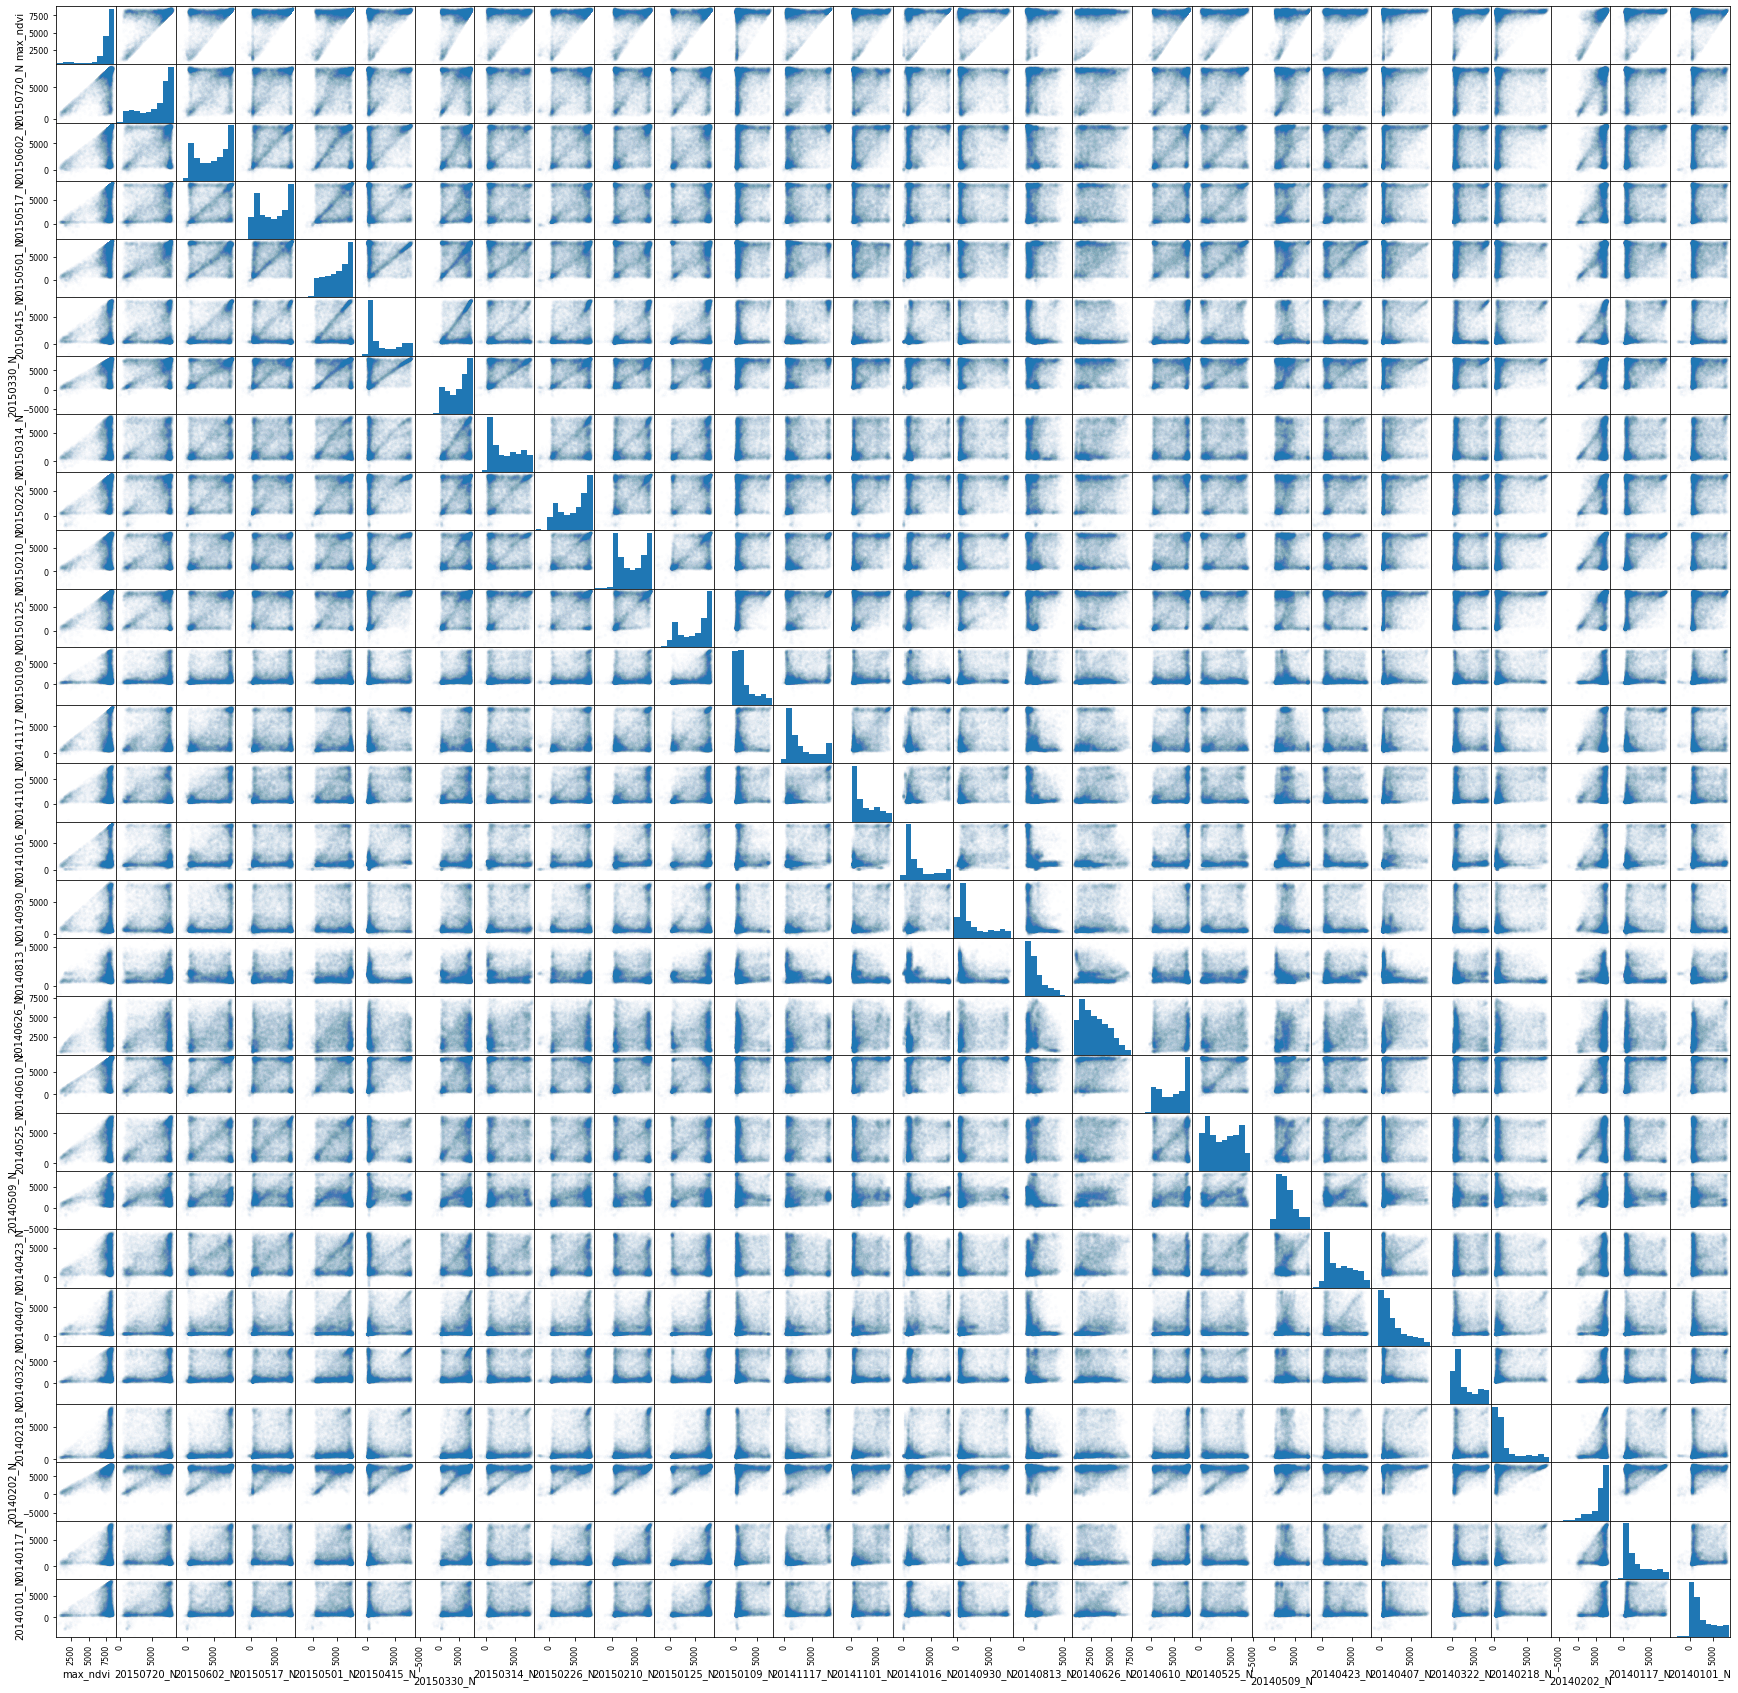

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (30, 30))
pass

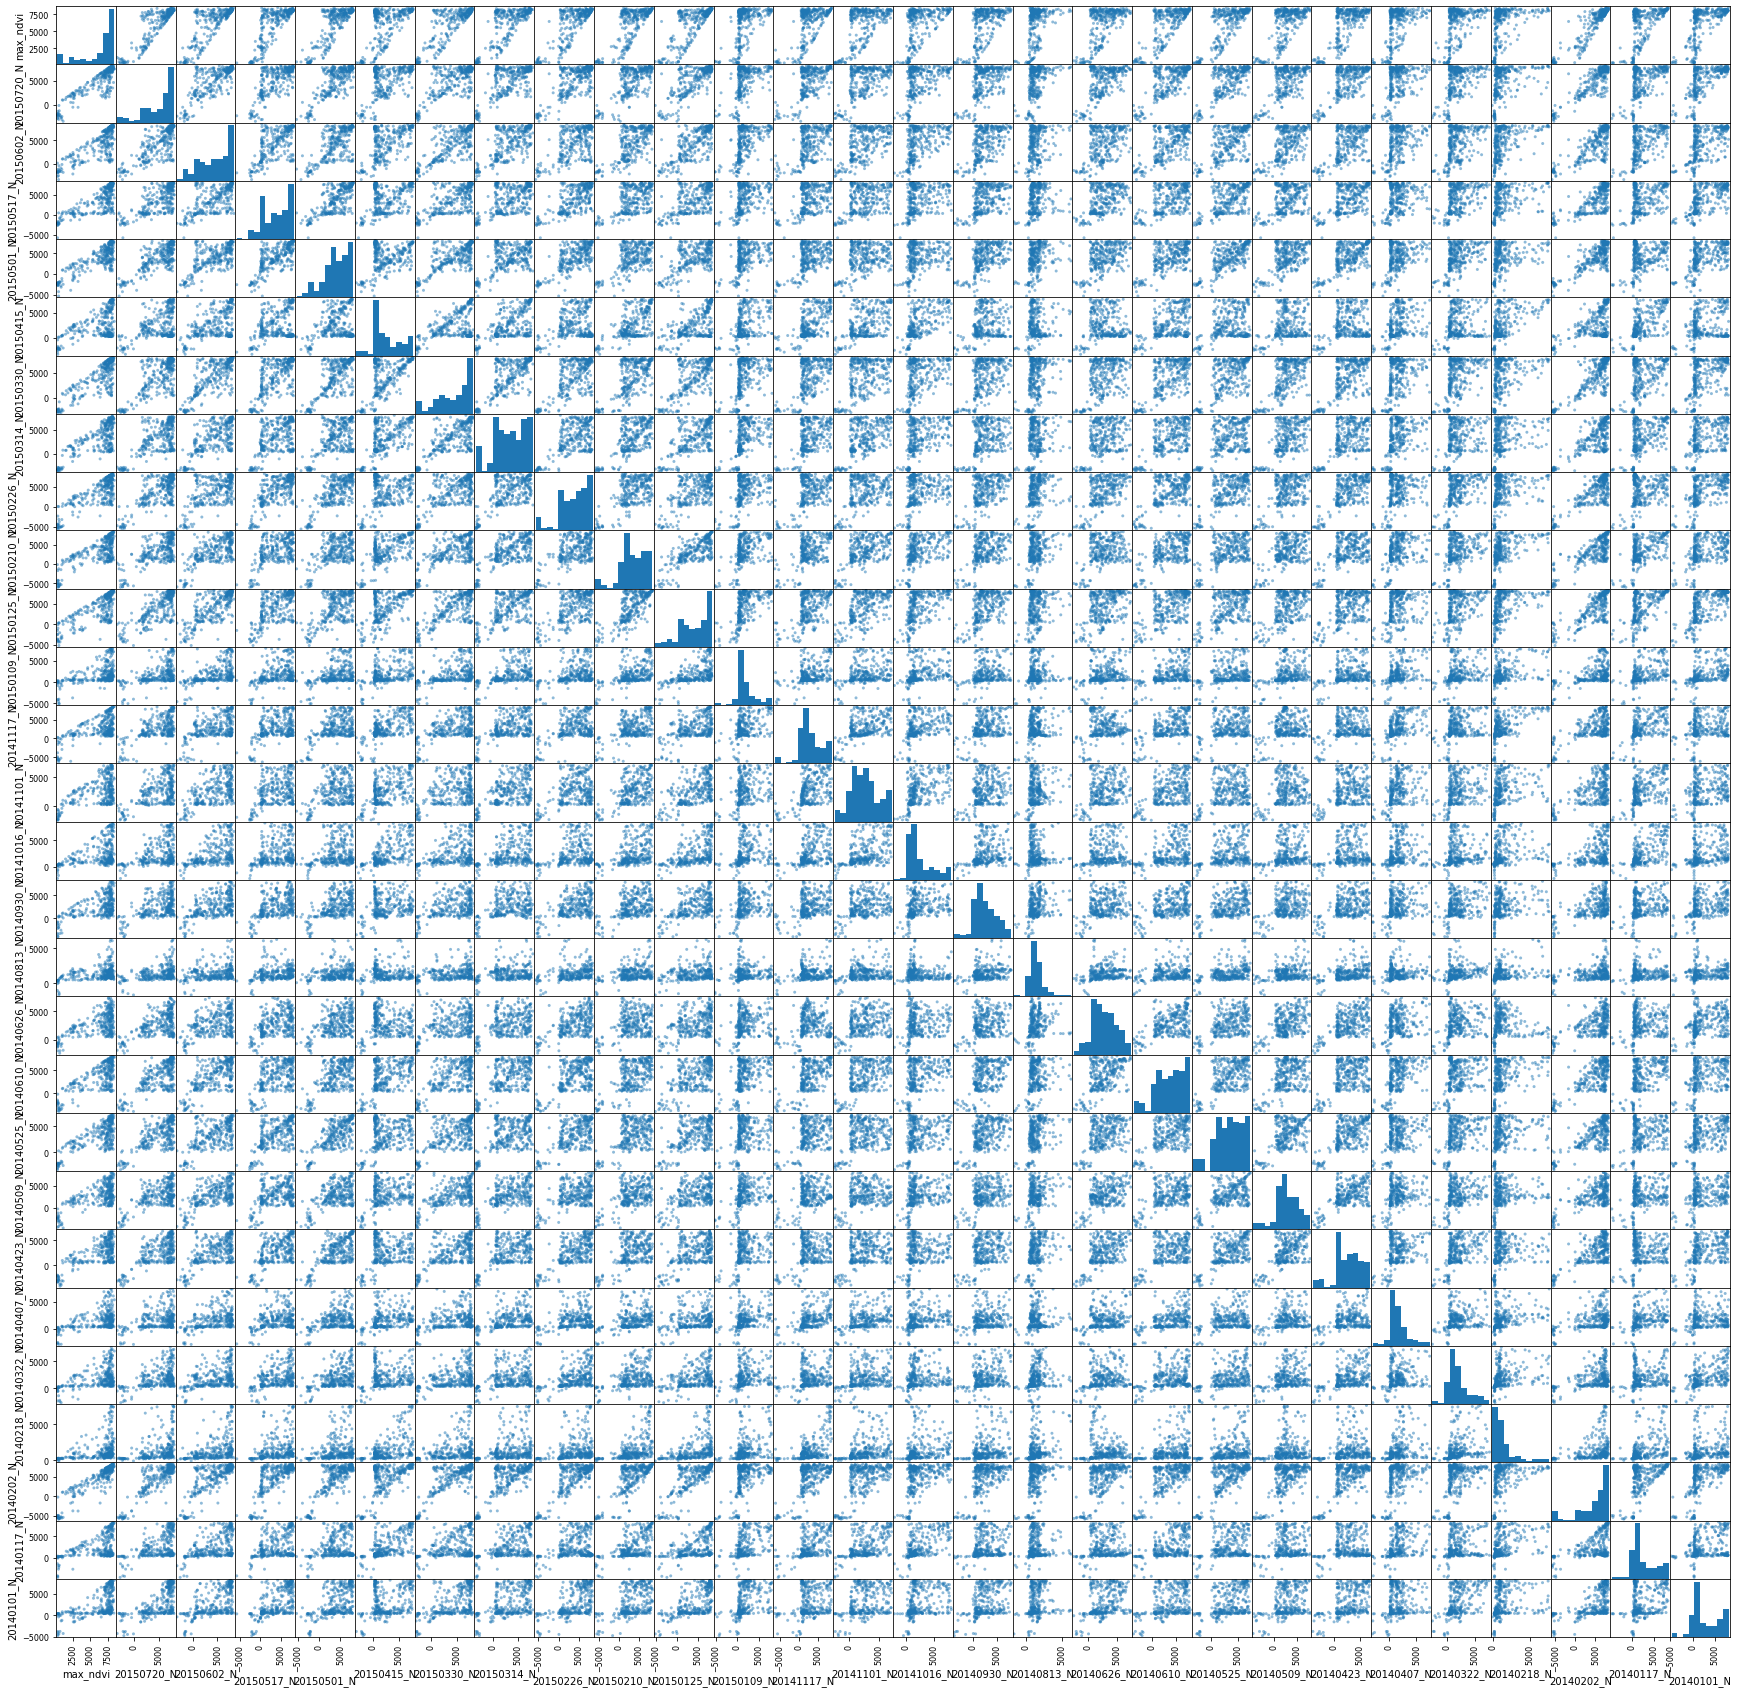

In [58]:
scatter_matrix(data_2, alpha = .5, figsize = (30, 30))
pass

##### Смотрим на попарную корреляцию признаков:

In [62]:
data.corr()

max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
max_ndvi    1.000000    0.578107    0.440258    0.444904    0.543092   
20150720_N  0.578107    1.000000    0.195431    0.331942    0.473371   
20150602_N  0.440258    0.195431    1.000000    0.214937    0.193980   
20150517_N  0.444904    0.331942    0.214937    1.000000    0.422241   
20150501_N  0.543092    0.473371    0.193980    0.422241    1.000000   
20150415_N  0.229725    0.114487    0.494569    0.079452    0.113853   
20150330_N  0.462855    0.207931    0.418051    0.191357    0.226913   
20150314_N  0.250101    0.026875    0.239266    0.045328    0.023459   
20150226_N  0.515929    0.290102    0.320833    0.291893    0.304795   
20150210_N  0.370539    0.161009    0.465054    0.116025    0.115780   
20150125_N  0.477365    0.268122    0.460814    0.153529    0.205181   
20150109_N  0.211471    0.186568    0.269869    0.138254    0.073372   
20141117_N  0.244041    0.109578    0.441036    0.160647    0.141837   
20141101_N  0.184436    0.032833    0.485754    0.080733    0.004841   
20141016_N  0.213040    0.078794    0.405791    0.033543    0.048222   
20140930_N  0.158774    0.056955    0.344610    0.065267    0.004552   
20140813_N  0.130187    0.102519   -0.183333    0.034831    0.113791   
20140626_N  0.270246    0.182624    0.233648    0.056985    0.039943   
20140610_N  0.422561    0.239311    0.406945    0.134723    0.223104   
20140525_N  0.292086    0.341046    0.089858    0.182728    0.243508   
20140509_N  0.248299    0.193955    0.132021    0.044826    0.077998   
20140423_N  0.281613    0.199956    0.038350    0.206130    0.219817   
20140407_N  0.219089    0.102621    0.355109    0.078754    0.024442   
20140322_N  0.285901    0.201553    0.197017    0.222905    0.312445   
20140218_N  0.259365    0.054973    0.450043    0.105096    0.092791   
20140202_N  0.844788    0.499929    0.381121    0.375727    0.492222   
20140117_N  0.223765    0.124718    0.441204    0.067778    0.104700   
20140101_N  0.216677    0.141264    0.239930    0.122279    0.042711   

            20150415_N  20150330_N  20150314_N  20150226_N  20150210_N  ...  \
max_ndvi      0.229725    0.462855    0.250101    0.515929    0.370539  ...   
20150720_N    0.114487    0.207931    0.026875    0.290102    0.161009  ...   
20150602_N    0.494569    0.418051    0.239266    0.320833    0.465054  ...   
20150517_N    0.079452    0.191357    0.045328    0.291893    0.116025  ...   
20150501_N    0.113853    0.226913    0.023459    0.304795    0.115780  ...   
20150415_N    1.000000    0.373261    0.060950    0.293153    0.481182  ...   
20150330_N    0.373261    1.000000    0.243872    0.256524    0.359052  ...   
20150314_N    0.060950    0.243872    1.000000    0.188262    0.194930  ...   
20150226_N    0.293153    0.256524    0.188262    1.000000    0.354842  ...   
20150210_N    0.481182    0.359052    0.194930    0.354842    1.000000  ...   
20150125_N    0.427880    0.434731    0.271622    0.281564    0.522616  ...   
20150109_N    0.222024    0.269679    0.139809    0.159187    0.208339  ...   
20141117_N    0.543363    0.247927    0.083767    0.303067    0.401791  ...   
20141101_N    0.482686    0.257072    0.214338    0.240240    0.440611  ...   
20141016_N    0.484010    0.255526    0.147296    0.194920    0.462362  ...   
20140930_N    0.329906    0.201119    0.191081    0.206490    0.330105  ...   
20140813_N   -0.169984    0.057377   -0.095126   -0.087211   -0.117625  ...   
20140626_N   -0.035561    0.097301    0.317162    0.123122    0.130284  ...   
20140610_N    0.419160    0.273112    0.077772    0.316120    0.501332  ...   
20140525_N   -0.050686    0.060333    0.061216    0.124008    0.003724  ...   
20140509_N    0.030754    0.089276    0.045676    0.107529    0.042303  ...   
20140423_N   -0.138086    0.097646    0.144983    0.074983   -0.093501  ...   
20140407_N    0.320464    0.253693    0.285395    0.206002    0.348783  ...   
20140322_N    0.186767    0

In [63]:
data_2.corr()

max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
max_ndvi    1.000000    0.884573    0.788152    0.763648    0.803593   
20150720_N  0.884573    1.000000    0.763482    0.715666    0.775730   
20150602_N  0.788152    0.763482    1.000000    0.659889    0.685760   
20150517_N  0.763648    0.715666    0.659889    1.000000    0.733419   
20150501_N  0.803593    0.775730    0.685760    0.733419    1.000000   
20150415_N  0.484794    0.465886    0.524509    0.392281    0.347890   
20150330_N  0.816687    0.721998    0.767116    0.686767    0.727714   
20150314_N  0.706330    0.630534    0.681940    0.542313    0.536725   
20150226_N  0.774179    0.712456    0.599574    0.701971    0.727993   
20150210_N  0.702865    0.681426    0.677861    0.538755    0.555483   
20150125_N  0.743368    0.775415    0.769626    0.625906    0.613241   
20150109_N  0.472403    0.489723    0.519672    0.430756    0.406898   
20141117_N  0.598129    0.585363    0.510824    0.442349    0.508868   
20141101_N  0.514141    0.530195    0.552325    0.395483    0.343591   
20141016_N  0.408627    0.402201    0.465458    0.350873    0.263367   
20140930_N  0.557319    0.543416    0.552185    0.499599    0.533276   
20140813_N  0.372390    0.418659    0.271281    0.207753    0.321021   
20140626_N  0.574763    0.572502    0.451469    0.473217    0.504137   
20140610_N  0.718841    0.716522    0.665679    0.552322    0.630526   
20140525_N  0.718831    0.699422    0.624535    0.608951    0.727053   
20140509_N  0.645630    0.619031    0.597273    0.450045    0.549751   
20140423_N  0.697508    0.667380    0.605197    0.582775    0.635733   
20140407_N  0.455411    0.389486    0.425953    0.347836    0.372248   
20140322_N  0.444366    0.459742    0.447527    0.449441    0.471715   
20140218_N  0.356127    0.335455    0.411616    0.303690    0.275354   
20140202_N  0.916957    0.876549    0.763145    0.736235    0.794661   
20140117_N  0.450250    0.477919    0.503598    0.384626    0.342155   
20140101_N  0.609231    0.646223    0.595556    0.640091    0.538961   

            20150415_N  20150330_N  20150314_N  20150226_N  20150210_N  ...  \
max_ndvi      0.484794    0.816687    0.706330    0.774179    0.702865  ...   
20150720_N    0.465886    0.721998    0.630534    0.712456    0.681426  ...   
20150602_N    0.524509    0.767116    0.681940    0.599574    0.677861  ...   
20150517_N    0.392281    0.686767    0.542313    0.701971    0.538755  ...   
20150501_N    0.347890    0.727714    0.536725    0.727993    0.555483  ...   
20150415_N    1.000000    0.520731    0.585553    0.301551    0.619657  ...   
20150330_N    0.520731    1.000000    0.707631    0.656725    0.641617  ...   
20150314_N    0.585553    0.707631    1.000000    0.570253    0.652467  ...   
20150226_N    0.301551    0.656725    0.570253    1.000000    0.585183  ...   
20150210_N    0.619657    0.641617    0.652467    0.585183    1.000000  ...   
20150125_N    0.597936    0.705492    0.661377    0.636052    0.753288  ...   
20150109_N    0.452693    0.434492    0.498237    0.419819    0.516552  ...   
20141117_N    0.637109    0.536985    0.543150    0.484219    0.559733  ...   
20141101_N    0.554159    0.432897    0.542893    0.393310    0.564260  ...   
20141016_N    0.651817    0.392135    0.434117    0.266882    0.469274  ...   
20140930_N    0.217452    0.477824    0.394642    0.542425    0.496845  ...   
20140813_N    0.054360    0.296478    0.189834    0.311137    0.357899  ...   
20140626_N    0.042772    0.436727    0.383504    0.552320    0.313183  ...   
20140610_N    0.475943    0.640038    0.573917    0.594832    0.595283  ...   
20140525_N    0.321717    0.612891    0.484214    0.633056    0.517391  ...   
20140509_N    0.283574    0.637265    0.577982    0.510716    0.508510  ...   
20140423_N    0.226006    0.618909    0.514773    0.672774    0.508319  ...   
20140407_N    0.368282    0.371532    0.463379    0.337202    0.405092  ...   
20140322_N    0.177972    0

##### Отдельные графики коррелируемых признаков (`max_ndvi` и `20150720_N`):

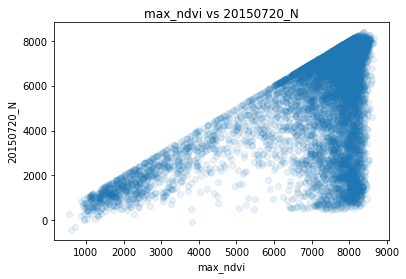

In [65]:
plt.plot(data['max_ndvi'], data['20150720_N'], 'o', alpha = 0.1)
plt.xlabel('max_ndvi')
plt.ylabel('20150720_N')
plt.title('max_ndvi vs 20150720_N')
pass

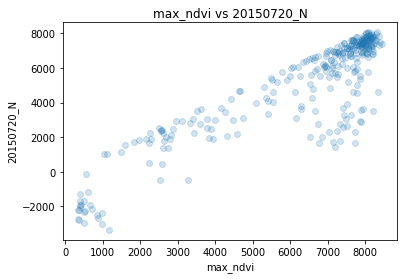

In [69]:
plt.plot(data_2['max_ndvi'], data_2['20150720_N'], 'o', alpha = 0.2)
plt.xlabel('max_ndvi')
plt.ylabel('20150720_N')
plt.title('max_ndvi vs 20150720_N')
pass

##### проверка на принадлежность элементов столбца к заданному классу:

In [70]:
data['class'] == 'water'

0         True
1         True
2         True
3         True
4         True
5        False
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
10515    False
10516    False
10517    False
10518    False
10519    False
10520    False
10521    False
10522    False
10523    False
10524    False
10525    False
10526    False
10527    False
10528    False
10529    False
10530    False
10531    False
10532    False
10533    False
10534    False
10535    False
10536    False
10537    False
10538    False
10539    False
10540    False
10541    False
10542    False
10543    False
10544    False
Name: class, Length: 10545, dtype: bool

In [75]:
data_2['class'] == 'impervious'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
270    False
271    False
272    False
273    False
274    False
275     True
276     True
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
Name: class, Length: 300, dtype: bool

##### Точечная диаграмма зависимости 2 признаков (`max_ndvi` и `20150720_N`) с обозначение принадлежности к классам:

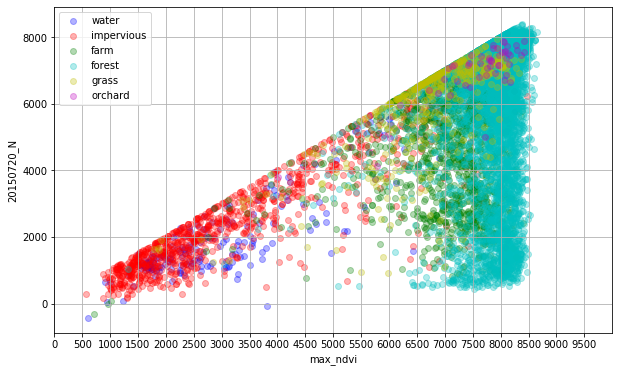

In [140]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 'water']['max_ndvi'],
            data[data['class'] == 'water']['20150720_N'],
            alpha = 0.3,
            label = 'water',
            color = 'b')

plt.scatter(data[data['class'] == 'impervious']['max_ndvi'],
            data[data['class'] == 'impervious']['20150720_N'],
            alpha = 0.3,
            label = 'impervious',
            color = 'r')

plt.scatter(data[data['class'] == 'farm']['max_ndvi'],
            data[data['class'] == 'farm']['20150720_N'],
            alpha = 0.3,
            label = 'farm',
            color = 'g')

plt.scatter(data[data['class'] == 'forest']['max_ndvi'],
            data[data['class'] == 'forest']['20150720_N'],
            alpha = 0.3,
            label = 'forest',
            color = 'c')

plt.scatter(data[data['class'] == 'grass']['max_ndvi'],
            data[data['class'] == 'grass']['20150720_N'],
            alpha = 0.3,
            label = 'grass',
            color = 'y')

plt.scatter(data[data['class'] == 'orchard']['max_ndvi'],
            data[data['class'] == 'orchard']['20150720_N'],
            alpha = 0.3,
            label = 'orchard',
            color = 'm')


plt.xlabel('max_ndvi')
plt.xticks(np.arange(0, 10000, step=500))
plt.xlim(0, 10000)
plt.ylabel('20150720_N')
plt.legend()
plt.grid()

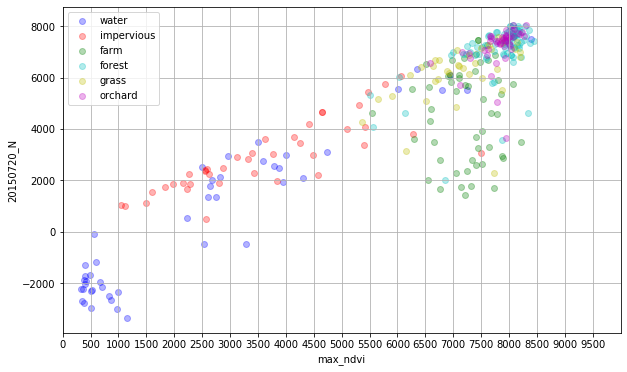

In [138]:
plt.figure(figsize = (10, 6))

plt.scatter(data_2[data_2['class'] == 'water']['max_ndvi'],
            data_2[data_2['class'] == 'water']['20150720_N'],
            alpha = 0.3,
            label = 'water',
            color = 'b')

plt.scatter(data_2[data_2['class'] == 'impervious']['max_ndvi'],
            data_2[data_2['class'] == 'impervious']['20150720_N'],
            alpha = 0.3,
            label = 'impervious',
            color = 'r')

plt.scatter(data_2[data_2['class'] == 'farm']['max_ndvi'],
            data_2[data_2['class'] == 'farm']['20150720_N'],
            alpha = 0.3,
            label = 'farm',
            color = 'g')

plt.scatter(data_2[data_2['class'] == 'forest']['max_ndvi'],
            data_2[data_2['class'] == 'forest']['20150720_N'],
            alpha = 0.3,
            label = 'forest',
            color = 'c')

plt.scatter(data_2[data_2['class'] == 'grass']['max_ndvi'],
            data_2[data_2['class'] == 'grass']['20150720_N'],
            alpha = 0.3,
            label = 'grass',
            color = 'y')

plt.scatter(data_2[data_2['class'] == 'orchard']['max_ndvi'],
            data_2[data_2['class'] == 'orchard']['20150720_N'],
            alpha = 0.3,
            label = 'orchard',
            color = 'm')


plt.xlabel('max_ndvi')
plt.xticks(np.arange(0, 10000, step=500))
plt.xlim(0, 10000)
plt.ylabel('20150720_N')
plt.legend()
plt.grid()

##### И др. диаграмма зависимости(`max_ndvi` и `20150501_N`):

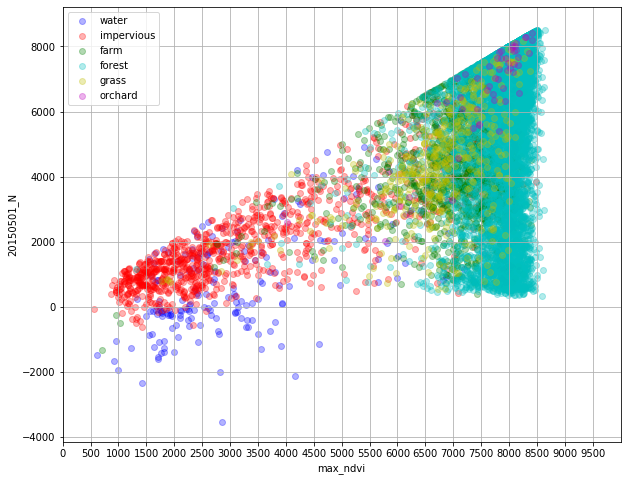

In [174]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['class'] == 'water']['max_ndvi'],
            data[data['class'] == 'water']['20150501_N'],
            alpha = 0.3,
            label = 'water',
            color = 'b')

plt.scatter(data[data['class'] == 'impervious']['max_ndvi'],
            data[data['class'] == 'impervious']['20150501_N'],
            alpha = 0.3,
            label = 'impervious',
            color = 'r')

plt.scatter(data[data['class'] == 'farm']['max_ndvi'],
            data[data['class'] == 'farm']['20150501_N'],
            alpha = 0.3,
            label = 'farm',
            color = 'g')

plt.scatter(data[data['class'] == 'forest']['max_ndvi'],
            data[data['class'] == 'forest']['20150501_N'],
            alpha = 0.3,
            label = 'forest',
            color = 'c')

plt.scatter(data[data['class'] == 'grass']['max_ndvi'],
            data[data['class'] == 'grass']['20150501_N'],
            alpha = 0.3,
            label = 'grass',
            color = 'y')

plt.scatter(data[data['class'] == 'orchard']['max_ndvi'],
            data[data['class'] == 'orchard']['20150501_N'],
            alpha = 0.3,
            label = 'orchard',
            color = 'm')


plt.xlabel('max_ndvi')
plt.xticks(np.arange(0, 10000, step=500))
plt.xlim(0, 10000)
plt.ylabel('20150501_N')
plt.legend()
plt.grid()

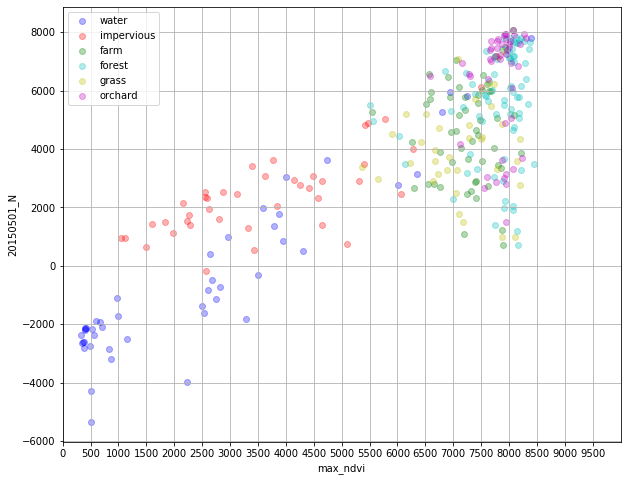

In [175]:
plt.figure(figsize = (10, 8))

plt.scatter(data_2[data_2['class'] == 'water']['max_ndvi'],
            data_2[data_2['class'] == 'water']['20150501_N'],
            alpha = 0.3,
            label = 'water',
            color = 'b')

plt.scatter(data_2[data_2['class'] == 'impervious']['max_ndvi'],
            data_2[data_2['class'] == 'impervious']['20150501_N'],
            alpha = 0.3,
            label = 'impervious',
            color = 'r')

plt.scatter(data_2[data_2['class'] == 'farm']['max_ndvi'],
            data_2[data_2['class'] == 'farm']['20150501_N'],
            alpha = 0.3,
            label = 'farm',
            color = 'g')

plt.scatter(data_2[data_2['class'] == 'forest']['max_ndvi'],
            data_2[data_2['class'] == 'forest']['20150501_N'],
            alpha = 0.3,
            label = 'forest',
            color = 'c')

plt.scatter(data_2[data_2['class'] == 'grass']['max_ndvi'],
            data_2[data_2['class'] == 'grass']['20150501_N'],
            alpha = 0.3,
            label = 'grass',
            color = 'y')

plt.scatter(data_2[data_2['class'] == 'orchard']['max_ndvi'],
            data_2[data_2['class'] == 'orchard']['20150501_N'],
            alpha = 0.3,
            label = 'orchard',
            color = 'm')


plt.xlabel('max_ndvi')
plt.xticks(np.arange(0, 10000, step=500))
plt.xlim(0, 10000)
plt.ylabel('20150501_N')
plt.legend()
plt.grid()

##### Краткая характеристика номинальных признаков:

In [176]:
data.describe(include = ['object'])

class
count    10545
unique       6
top     forest
freq      7431

In [180]:
data_2.describe(include = ['object'])

class
count      300
unique       6
top     forest
freq        78

##### Описание всех признаков вместе:

In [177]:
data.describe(include = 'all')

class      max_ndvi    20150720_N    20150602_N    20150517_N  \
count    10545  10545.000000  10545.000000  10545.000000  10545.000000   
unique       6           NaN           NaN           NaN           NaN   
top     forest           NaN           NaN           NaN           NaN   
freq      7431           NaN           NaN           NaN           NaN   
mean       NaN   7282.721268   5713.832981   4777.434284   4352.914883   
std        NaN   1603.782784   2283.945491   2735.244614   2870.619613   
min        NaN    563.444000   -433.735000  -1781.790000  -2939.740000   
25%        NaN   7285.310000   4027.570000   2060.600000   1446.940000   
50%        NaN   7886.260000   6737.730000   5270.020000   4394.340000   
75%        NaN   8121.780000   7589.020000   7484.110000   7317.950000   
max        NaN   8650.500000   8377.720000   8566.420000   8650.500000   

          20150501_N    20150415_N    20150330_N    20150314_N    20150226_N  \
count   10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     5077.372030   2871.423540   4898.348680   3338.303406   4902.600296   
std      2512.162084   2675.074079   2578.318759   2421.309390   2691.397266   
min     -3536.540000  -1815.630000  -5992.080000  -1677.600000  -2624.640000   
25%      2984.370000    526.911000   2456.310000   1017.710000   2321.550000   
50%      5584.070000   1584.970000   5638.400000   2872.980000   5672.730000   
75%      7440.210000   5460.080000   7245.040000   5516.610000   7395.610000   
max      8516.100000   8267.120000   8499.330000   8001.700000   8452.380000   

        ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count   ...  10545.000000  10545.000000  10545.000000  10545.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...   4787.492858   3640.367446   3027.313647   3022.054677   
std     ...   2745.333581   2298.281052   2054.223951   2176.307289   
min     ...  -3765.860000  -1043.160000  -4869.010000  -1505.780000   
25%     ...   2003.930000   1392.390000   1405.020000   1010.180000   
50%     ...   5266.930000   3596.680000   2671.400000   2619.180000   
75%     ...   7549.430000   5817.750000   4174.010000   4837.610000   
max     ...   8489.970000   7981.820000   8445.410000   7919.070000   

          20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count   10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2041.609136   2691.604363   2058.300423   6109.309315   2563.511596   
std      2020.499263   2408.279935   2212.018257   1944.613487   2336.052498   
min     -1445.370000  -4354.630000   -232.292000  -6807.550000  -2139.860000   
25%       429.881000    766.451000    494.858000   5646.670000    689.922000   
50%      1245.900000   1511.180000    931.713000   6862.060000   1506.570000   
75%      3016.520000   4508.510000   2950.880000   7378.020000   4208.730000   
max      8206.780000   8235.400000   8247.630000   8410.330000   8418.230000   

          20140101_N  
count   10545.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     2558.926018  
std      2413.851082  
min     -4145.250000  
25%       685.680000  
50%      1458.870000  
75%      4112.550000  
max      8502.020000  

[11 rows x 29 columns]

In [181]:
data_2.describe(include = 'all')

class     max_ndvi   20150720_N  20150602_N   20150517_N  \
count      300   300.000000   300.000000    300.0000   300.000000   
unique       6          NaN          NaN         NaN          NaN   
top     forest          NaN          NaN         NaN          NaN   
freq        78          NaN          NaN         NaN          NaN   
mean       NaN  6247.971963  5015.056836   4385.3962  3800.797553   
std        NaN  2385.719021  2915.136674   3084.3832  3116.515365   
min        NaN   338.410000 -3363.640000  -3345.1200 -5774.370000   
25%        NaN  5418.985000  2976.532500   1779.1650   843.567500   
50%        NaN  7387.490000  6163.000000   4947.5050  4116.715000   
75%        NaN  7915.442500  7344.742500   7265.3125  6827.887500   
max        NaN  8456.640000  8066.330000   8395.2200  8120.720000   

         20150501_N   20150415_N   20150330_N   20150314_N   20150226_N  ...  \
count    300.000000   300.000000   300.000000   300.000000   300.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean    3966.412737  2558.365215  4365.064176  3325.010427  3776.860932  ...   
std     2958.117290  2649.802178  3159.781436  3036.748437  3407.339660  ...   
min    -5355.400000 -3232.180000 -2903.690000 -3520.840000 -5604.450000  ...   
25%     2343.582500   499.069250  2059.550000  1002.313250  1470.627500  ...   
50%     4343.810000  1728.435000  5360.910000  3445.865000  4481.830000  ...   
75%     6349.442500  4936.315000  7195.722500  6179.562500  6609.842500  ...   
max     8080.440000  7702.930000  8125.250000  7945.170000  8268.190000  ...   

         20140610_N   20140525_N   20140509_N   20140423_N   20140407_N  \
count    300.000000   300.000000   300.000000   300.000000   300.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    3741.170857  3382.236283  2856.504857  2652.255649  1648.150809   
std     3002.104551  2479.618559  2521.491242  2512.557793  1724.750699   
min    -3991.910000 -3257.730000 -4580.670000 -4212.560000 -2853.890000   
25%     1604.072500  1586.840000  1333.682500   864.526250   417.234750   
50%     4128.965000  3636.785000  2685.050000  2689.695000  1402.630000   
75%     6435.267500  5491.050000  4668.722500  4491.230000  2369.442500   
max     8158.640000  7249.500000  7957.620000  6941.390000  7359.330000   

         20140322_N   20140218_N   20140202_N   20140117_N   20140101_N  
count    300.000000   300.000000   300.000000   300.000000   300.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean    1895.471677  1467.793137  4731.176773  2591.095320  2836.842958  
std     1889.614140  1639.242268  3655.818618  2656.194366  3044.467806  
min    -2713.350000   -86.414000 -5853.150000 -4550.190000 -4723.980000  
25%      591.682000   464.485500  3268.892500   677.989250   515.142000  
50%     1447.985000   886.093000  6223.860000  1511.815000  1626.075000  
75%     2625.180000  1702.732500  7273.625000  4645.017500  5835.562500  
max     7602.040000  7610.580000  8370.570000  8363.950000  8138.400000  

[11 rows x 29 columns]

##### Список всех возможных вариантов класса:

In [179]:
data['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

In [182]:
data_2['class'].unique()

array(['water', 'forest', 'grass', 'farm', 'orchard', 'impervious'],
      dtype=object)

##### `max_ndvi` у первых представителей каждого класса:

In [183]:
for name in data['class'].unique():
    print(name, data['max_ndvi'][data['class'] == name].iloc[0])

water 997.904
forest 7091.96
impervious 1522.31
farm 1025.54
grass 6634.83
orchard 8173.24


In [184]:
for name in data_2['class'].unique():
    print(name, data_2['max_ndvi'][data_2['class'] == name].iloc[0])

water 2750.11
forest 8072.83
grass 7505.21
farm 8091.8
orchard 8066.33
impervious 2617.0


## Задача


##### В качестве тренировки попробуем выкинуть столбцы, но для решения задачи не будем этого использовать, а будем использовать все признаки

In [187]:
data = data.drop('20150602_N', axis = 1)\
            .drop('20150720_N', axis = 1)

In [191]:
data_2 = data_2.drop('20150602_N', axis = 1)\
            .drop('20150720_N', axis = 1)

In [190]:
data.drop(['20150720_N','20150602_N'], axis = 1) # так тоже работает

class  max_ndvi  20150517_N  20150501_N  20150415_N  20150330_N  \
0           water   997.904   -1882.030 -1924.36000     997.904 -1739.99000   
1           water   914.198   -1625.790 -1672.32000     914.198  -692.38600   
2           water  3800.810     449.735  1071.21000     546.371  1077.84000   
3           water   952.178     210.714 -1052.63000     578.807 -1564.63000   
4           water  1232.120     380.436 -1256.93000     515.805 -1413.18000   
5          forest  7091.960     201.956  6130.95000    6439.300  6818.67000   
6           water  6423.920     756.563  2978.58000    3215.560  5033.86000   
7           water  2455.480     205.408  1647.83000    1935.800   -44.56840   
8           water  2631.760    -408.147  1685.70000    1046.670    -7.58804   
9           water  3192.460     727.773   180.49100    1779.890  2613.97000   
10          water  2511.500    1977.220  1333.62000    2062.170  -196.96700   
11          water  2833.130    -725.103  1720.86000    1665.010  1037.84000   
12          water  2590.210    1200.170  1591.18000    2043.800  1608.75000   
13          water  3317.610   -1535.140  1911.48000    2036.620  2111.92000   
14          water  2962.690     229.826  1831.99000    1842.560  2186.74000   
15          water  5011.310    3088.330  2260.56000    1864.960  1834.98000   
16          water  3085.630    -103.276  -145.82200     444.444  -306.79500   
17          water  3721.920    -493.602  1080.80000    -412.541  -242.05700   
18          water  3934.790     250.550    96.00030     574.646   215.31400   
19          water  3715.960    1681.950  -731.91500    -348.172   912.22900   
20          water  3505.660     593.220  -821.68600    -463.782   -77.57060   
21          water  4065.360     575.423   651.97000    3075.730  1181.10000   
22          water  3299.410    -602.320  -404.22700    1793.330  -650.27000   
23          water  3076.460     430.590   394.51600     928.590  -224.33900   
24          water  3140.210    -880.243     9.86838    1483.800   287.49000   
25          water  6040.450    5595.630  5748.86000    1018.940  4652.31000   
26          water  3539.320    -170.996   811.58900    1231.470   621.69300   
27          water  3279.630    -326.160    66.51030    1481.830   733.93000   
28          water  3923.730     650.845   109.14300     811.960  2715.56000   
29          water  3547.040    -566.926  1683.87000    1382.050   152.78800   
...           ...       ...         ...         ...         ...         ...   
10515        farm  7428.500    2444.440  1536.75000    4872.430  5376.42000   
10516     orchard  7730.120    2212.300  6358.11000    6099.540  6475.57000   
10517     orchard  7421.370    1269.900  7020.54000    7041.620  7144.47000   
10518     orchard  7754.370    1691.400  7034.62000    6484.860  6856.48000   
10519       grass  7699.540    3848.270  2030.59000    2471.940  3251.12000   
10520  impervious  1870.030    -572.470    72.65840     765.464   145.29800   
10521       grass  3788.560    2232.320  2171.32000    2653.800  2419.41000   
10522        farm  3666.570     335.445  3107.02000    2966.740  3666.57000   
10523  impervious  1167.760     304.138   670.79200     847.085   568.28200   
10524  impervious  2768.790     548.539  1896.19000    1773.740  1883.42000   
10525  impervious  3400.000    1465.290  1964.74000    2384.670  1369.24000   
10526  impervious  6695.850    2572.610  2953.98000    1016.880  2706.53000   
10527  impervious  7520.230    4841.080  4782.50000     675.109  5258.98000   
10528  impervious  2482.660    1484.840  1796.04000    1774.020  1752.19000   
10529  impervious  1836.690     735.491   841.06600    1215.110   833.33300   
10530  impervious  1806.420    -117.073  -106.60500    1275.630  -197.56200   
10531  impervious  2177.130     525.036   483.05500     860.513   410.79300   
10532  impervious  5319.060    3658.030  3550.13000     326.861  3936.88000   
10533  impervious  6722.870    6050.260  5240.34000     287.67

In [192]:
data_2.drop(['20150720_N','20150602_N'], axis = 1)

class  max_ndvi  20150517_N  20150501_N  20150415_N  20150330_N  \
0         water  2750.110  -521.17300   -1123.910   2653.0800   -264.4140   
1         water  2646.250     6.26571     398.950   2646.2500    550.9820   
2         water  3509.620 -1239.32000    -330.388   1257.1900   -175.1710   
3         water  2820.470  -522.28100    -741.163   2334.7000   -207.4360   
4         water  2684.130  1713.62000    -472.258   2526.9900    -91.7429   
5         water  2602.320   439.01400    -832.624   2220.7300   -546.3680   
6         water  6010.830  5355.66000    2772.670   2002.5500   5382.9600   
7         water  2963.340  1513.54000    1001.220   1364.9700   1830.9900   
8         water  4306.090    10.52640     501.750   3175.9000    788.9330   
9         water  4004.910    69.39950    3037.290   1375.6900    401.0220   
10        water  3947.330  -102.28300     844.944    417.2850    471.9710   
11        water  3885.990    61.42770    1775.690    266.7740    318.8320   
12        water  3784.810   -13.06340    1377.190    972.8030    439.8930   
13        water  3587.260   422.70200    1967.200   1374.4700    152.1840   
14        water  7241.120  5960.90000    5795.850   4664.8600   6060.8000   
15       forest  8072.830  7801.30000    5960.230   6007.0200   6405.4400   
16       forest  7909.610  6680.53000    3667.000   5110.9700   5473.6300   
17       forest  8181.920  7596.59000    5044.830   5746.5100   5725.7800   
18       forest  7299.700  1677.16000    3831.260   5084.1600   1695.0000   
19        grass  7505.210  5771.51000    4356.040   3948.9700   3354.9700   
20       forest  7648.710  7251.18000    6335.900   5781.7600   5967.8800   
21       forest  7970.680  6984.44000    7416.000   7424.4100   7583.0900   
22       forest  7769.530  6093.45000    5193.070   5185.6000   5332.7700   
23       forest  8035.770  8035.77000    7705.380   7111.1400   7286.8500   
24        grass  7737.770  6767.88000    6235.910   6106.9100   4903.4700   
25       forest  8178.340  7219.16000    5773.600   6110.7800   6411.6200   
26       forest  7345.530  6569.47000    6216.330   5940.4700   6007.0900   
27       forest  7991.910  5732.13000    7337.880   7163.3300   7500.3300   
28       forest  8167.330  6967.26000    7618.070   7629.2100   7630.0500   
29       forest  8120.720  8120.72000    7828.350   7563.6700   7618.3900   
..          ...       ...         ...         ...         ...         ...   
270      forest  8206.490  7724.36000    7805.980   7702.9300   7961.0900   
271      forest  8040.380  6047.88000    5378.300   5780.3700   7777.9100   
272      forest  8026.920  6949.79000    7021.710   6969.0300   7490.6300   
273      forest  7590.410  1523.94000    5798.660   4947.4600   5856.5300   
274      forest  8222.540  1884.44000    6145.390   7004.8100   7781.8400   
275  impervious  1598.600   246.14000    1440.570   1415.2500   1438.0500   
276  impervious  5403.700  2989.63000    3493.000   3395.7500   3531.7500   
277       grass  6727.610  3049.24000    3158.050   2913.6700   3824.7100   
278       water   379.758 -2279.25000   -2599.880   -384.5960  -2236.7900   
279       water   387.999 -2624.11000   -2828.660  -2041.7500  -2383.6900   
280       water   360.375 -5774.37000   -2594.560  -2812.8800  -2540.4500   
281       water   419.574 -2125.36000   -2136.200  -2113.2200  -2858.7000   
282       water   531.829 -2189.94000   -2182.450  -1984.3500  -2387.2800   
283       water   338.410 -2027.75000   -2364.180  -2201.5400  -2513.0100   
284       water  1160.080 -1227.35000   -2518.180  -1999.2400  -2554.2500   
285       water   664.988  -783.46400   -1919.190  -2327.5700  -2836.2000   
286       water   403.980 -1670.15000   -2164.640  -1685.3800  -2400.3400   
287       water   873.314  -432.73600   -3209.770  -1612.5800  -2903.6900   
288       water   397.932 -2072.41000   -2145.630  -3232.1800  -2769.3100   
289       water   398.479 -2116.73000   -2202.490  -1924.5300  -2774.3400   
290   

# Готовим данные

##### Смотрим типы признаков и разбиваем их на количественные и номинальные

In [185]:
data['class'].dtype.name

'object'

In [193]:
data_2['class'].dtype.name

'object'

In [195]:
data['20150517_N'].dtype.name

'float64'

In [196]:
data_2['20150517_N'].dtype.name

'float64'

##### Только класс (class) является номинальным признаком, остальные признаки числовые

In [4]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['class']
['max_ndvi', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


In [5]:
categorical_columns_2 = [c for c in data.columns if data_2[c].dtype.name == 'object']
numerical_columns_2   = [c for c in data.columns if data_2[c].dtype.name != 'object']
print(categorical_columns_2)
print(numerical_columns_2)

['class']
['max_ndvi', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


##### Возможные значения класса:

In [34]:
for c in categorical_columns:
    print(c, data[c].unique())

class ['water' 'forest' 'impervious' 'farm' 'grass' 'orchard']


In [35]:
for c in categorical_columns_2:
    print(c, data_2[c].unique())

class ['water' 'forest' 'grass' 'farm' 'orchard' 'impervious']


## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

##### ПРИМЕЧАНИЕ: На самом деле в нашей задаче нет пропущенных значений. Проделываем данную процедуру исключительно в тренировочных целях, чтобы отработать навык!

###### Заполнение строк средними значениями:

In [207]:
data.median(axis = 0)

max_ndvi      7886.260
20150720_N    6737.730
20150602_N    5270.020
20150517_N    4394.340
20150501_N    5584.070
20150415_N    1584.970
20150330_N    5638.400
20150314_N    2872.980
20150226_N    5672.730
20150210_N    4278.880
20150125_N    6261.950
20150109_N    1157.170
20141117_N    2277.560
20141101_N    1770.350
20141016_N    1600.950
20140930_N    1210.230
20140813_N    1260.280
20140626_N    2779.570
20140610_N    5266.930
20140525_N    3596.680
20140509_N    2671.400
20140423_N    2619.180
20140407_N    1245.900
20140322_N    1511.180
20140218_N     931.713
20140202_N    6862.060
20140117_N    1506.570
20140101_N    1458.870
dtype: float64

In [208]:
data_2.median(axis = 0)

max_ndvi      7387.490
20150720_N    6163.000
20150602_N    4947.505
20150517_N    4116.715
20150501_N    4343.810
20150415_N    1728.435
20150330_N    5360.910
20150314_N    3445.865
20150226_N    4481.830
20150210_N    3423.750
20150125_N    4788.675
20150109_N    1044.150
20141117_N    2314.430
20141101_N    2512.620
20141016_N    1597.925
20140930_N    2069.645
20140813_N    1166.125
20140626_N    2593.035
20140610_N    4128.965
20140525_N    3636.785
20140509_N    2685.050
20140423_N    2689.695
20140407_N    1402.630
20140322_N    1447.985
20140218_N     886.093
20140202_N    6223.860
20140117_N    1511.815
20140101_N    1626.075
dtype: float64

In [209]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [210]:
data_2 = data_2.fillna(data_2.median(axis = 0), axis = 0)

###### Проверка, что пропусков больше нет:

In [211]:
data[numerical_columns].count(axis = 0)

max_ndvi      10545
20150720_N    10545
20150602_N    10545
20150517_N    10545
20150501_N    10545
20150415_N    10545
20150330_N    10545
20150314_N    10545
20150226_N    10545
20150210_N    10545
20150125_N    10545
20150109_N    10545
20141117_N    10545
20141101_N    10545
20141016_N    10545
20140930_N    10545
20140813_N    10545
20140626_N    10545
20140610_N    10545
20140525_N    10545
20140509_N    10545
20140423_N    10545
20140407_N    10545
20140322_N    10545
20140218_N    10545
20140202_N    10545
20140117_N    10545
20140101_N    10545
dtype: int64

In [260]:
data_2[numerical_columns_2].count(axis = 0)

max_ndvi      300
20150720_N    300
20150602_N    300
20150517_N    300
20150501_N    300
20150415_N    300
20150330_N    300
20150314_N    300
20150226_N    300
20150210_N    300
20150125_N    300
20150109_N    300
20141117_N    300
20141101_N    300
20141016_N    300
20140930_N    300
20140813_N    300
20140626_N    300
20140610_N    300
20140525_N    300
20140509_N    300
20140423_N    300
20140407_N    300
20140322_N    300
20140218_N    300
20140202_N    300
20140117_N    300
20140101_N    300
dtype: int64

##### Пропуски в классах заполняем часто встречаемым значением:

In [213]:
data[categorical_columns].count(axis = 0)

class    10545
dtype: int64

In [261]:
data_2[categorical_columns_2].count(axis = 0)

class    300
dtype: int64

In [235]:
data['class'].describe()

count      10545
unique         6
top       forest
freq        7431
Name: class, dtype: object

In [238]:
data_2['class'].describe()

count        300
unique         6
top       forest
freq          78
Name: class, dtype: object

In [217]:
type(data['class'].describe())

pandas.core.series.Series

In [218]:
type(data_2['class'].describe())

pandas.core.series.Series

In [219]:
data['class'].describe().top

'forest'

In [239]:
data_2['class'].describe().top

'forest'

In [221]:
data['class'] = data['class'].fillna('forest')

In [240]:
data_2['class'] = data_2['class'].fillna('forest')

In [241]:
data.describe(include = [object])

class
count    10545
unique       6
top     forest
freq      7431

In [242]:
data_2.describe(include = [object])

class
count      300
unique       6
top     forest
freq        78

##### Метод заполнения пропусков во всех номинальных признаках наиболее часто встречаемыми значениями:

In [36]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [37]:
data_describe_2 = data_2.describe(include = [object])
for c in categorical_columns:
    data_2[c] = data_2[c].fillna(data_describe_2[c]['top'])

In [38]:
data.describe(include = [object])

class
count    10545
unique       6
top     forest
freq      7431

In [39]:
data_2.describe(include = [object])

class
count      300
unique       6
top     forest
freq        78

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

##### В нашем случае векторизовать можно только `class`, но это целевой признак и к нему применять векторизацию не нужно!!!!! Здесь же мы просто попрактикуем данный подход.

###### Выделение бинарных и небинарных признаков

In [21]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['class']


In [22]:
binary_columns_2    = [c for c in categorical_columns if data_describe_2[c]['unique'] == 2]
nonbinary_columns_2 = [c for c in categorical_columns if data_describe_2[c]['unique'] > 2]
print(binary_columns_2, nonbinary_columns_2)

[] ['class']


##### В нашей задаче нет бинарных признаков

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `class` принимает 6 различных значений: 

Заменим признак `class` 6 признаками: `water`, `forest`, ..., `impervious`.

 - Если признак `class` принимает значение `water`, то признак `water` равен `1`, а все остальные равны `0`.
 - Если признак `class` принимает значение `forest`, то признак `forest` равен `1`, а все остальные равны `0`.
 - и т.д.

##### Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [253]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['class_farm', 'class_forest', 'class_grass', 'class_impervious',
       'class_orchard', 'class_water'],
      dtype='object')


In [254]:
data_nonbinary_2 = pd.get_dummies(data_2[nonbinary_columns_2])
print(data_nonbinary_2.columns)

Index(['class_farm', 'class_forest', 'class_grass', 'class_impervious',
       'class_orchard', 'class_water'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [6]:
data_numerical = data[numerical_columns]
data_numerical.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    7282.721268   5713.832981   4777.434284   4352.914883   5077.372030   
std     1603.782784   2283.945491   2735.244614   2870.619613   2512.162084   
min      563.444000   -433.735000  -1781.790000  -2939.740000  -3536.540000   
25%     7285.310000   4027.570000   2060.600000   1446.940000   2984.370000   
50%     7886.260000   6737.730000   5270.020000   4394.340000   5584.070000   
75%     8121.780000   7589.020000   7484.110000   7317.950000   7440.210000   
max     8650.500000   8377.720000   8566.420000   8650.500000   8516.100000   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    2871.423540   4898.348680   3338.303406   4902.600296   4249.307925   
std     2675.074079   2578.318759   2421.309390   2691.397266   2777.809493   
min    -1815.630000  -5992.080000  -1677.600000  -2624.640000  -3403.050000   
25%      526.911000   2456.310000   1017.710000   2321.550000   1379.210000   
50%     1584.970000   5638.400000   2872.980000   5672.730000   4278.880000   
75%     5460.080000   7245.040000   5516.610000   7395.610000   7144.480000   
max     8267.120000   8499.330000   8001.700000   8452.380000   8422.060000   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  10545.000000  10545.000000  10545.000000  10545.000000   
mean   ...   4787.492858   3640.367446   3027.313647   3022.054677   
std    ...   2745.333581   2298.281052   2054.223951   2176.307289   
min    ...  -3765.860000  -1043.160000  -4869.010000  -1505.780000   
25%    ...   2003.930000   1392.390000   1405.020000   1010.180000   
50%    ...   5266.930000   3596.680000   2671.400000   2619.180000   
75%    ...   7549.430000   5817.750000   4174.010000   4837.610000   
max    ...   8489.970000   7981.820000   8445.410000   7919.070000   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    2041.609136   2691.604363   2058.300423   6109.309315   2563.511596   
std     2020.499263   2408.279935   2212.018257   1944.613487   2336.052498   
min    -1445.370000  -4354.630000   -232.292000  -6807.550000  -2139.860000   
25%      429.881000    766.451000    494.858000   5646.670000    689.922000   
50%     1245.900000   1511.180000    931.713000   6862.060000   1506.570000   
75%     3016.520000   4508.510000   2950.880000   7378.020000   4208.730000   
max     8206.780000   8235.400000   8247.630000   8410.330000   8418.230000   

         20140101_N  
count  10545.000000  
mean    2558.926018  
std     2413.851082  
min    -4145.250000  
25%      685.680000  
50%     1458.870000  
75%     4112.550000  
max     8502.020000  

[8 rows x 28 columns]

In [7]:
data_numerical_2 = data_2[numerical_columns_2]
data_numerical_2.describe()

max_ndvi   20150720_N  20150602_N   20150517_N   20150501_N  \
count   300.000000   300.000000    300.0000   300.000000   300.000000   
mean   6247.971963  5015.056836   4385.3962  3800.797553  3966.412737   
std    2385.719021  2915.136674   3084.3832  3116.515365  2958.117290   
min     338.410000 -3363.640000  -3345.1200 -5774.370000 -5355.400000   
25%    5418.985000  2976.532500   1779.1650   843.567500  2343.582500   
50%    7387.490000  6163.000000   4947.5050  4116.715000  4343.810000   
75%    7915.442500  7344.742500   7265.3125  6827.887500  6349.442500   
max    8456.640000  8066.330000   8395.2200  8120.720000  8080.440000   

        20150415_N   20150330_N   20150314_N   20150226_N   20150210_N  ...  \
count   300.000000   300.000000   300.000000   300.000000   300.000000  ...   
mean   2558.365215  4365.064176  3325.010427  3776.860932  3369.535416  ...   
std    2649.802178  3159.781436  3036.748437  3407.339660  3189.371415  ...   
min   -3232.180000 -2903.690000 -3520.840000 -5604.450000 -6000.000000  ...   
25%     499.069250  2059.550000  1002.313250  1470.627500  1491.545000  ...   
50%    1728.435000  5360.910000  3445.865000  4481.830000  3423.750000  ...   
75%    4936.315000  7195.722500  6179.562500  6609.842500  6021.447500  ...   
max    7702.930000  8125.250000  7945.170000  8268.190000  8299.640000  ...   

        20140610_N   20140525_N   20140509_N   20140423_N   20140407_N  \
count   300.000000   300.000000   300.000000   300.000000   300.000000   
mean   3741.170857  3382.236283  2856.504857  2652.255649  1648.150809   
std    3002.104551  2479.618559  2521.491242  2512.557793  1724.750699   
min   -3991.910000 -3257.730000 -4580.670000 -4212.560000 -2853.890000   
25%    1604.072500  1586.840000  1333.682500   864.526250   417.234750   
50%    4128.965000  3636.785000  2685.050000  2689.695000  1402.630000   
75%    6435.267500  5491.050000  4668.722500  4491.230000  2369.442500   
max    8158.640000  7249.500000  7957.620000  6941.390000  7359.330000   

        20140322_N   20140218_N   20140202_N   20140117_N   20140101_N  
count   300.000000   300.000000   300.000000   300.000000   300.000000  
mean   1895.471677  1467.793137  4731.176773  2591.095320  2836.842958  
std    1889.614140  1639.242268  3655.818618  2656.194366  3044.467806  
min   -2713.350000   -86.414000 -5853.150000 -4550.190000 -4723.980000  
25%     591.682000   464.485500  3268.892500   677.989250   515.142000  
50%    1447.985000   886.093000  6223.860000  1511.815000  1626.075000  
75%    2625.180000  1702.732500  7273.625000  4645.017500  5835.562500  
max    7602.040000  7610.580000  8370.570000  8363.950000  8138.400000  

[8 rows x 28 columns]

##### Нормализация (из значения вычитаем среднее по столбцу и делим полученное на стандартное отклонение):

In [8]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [9]:
data_numerical_2 = (data_numerical_2 - data_numerical_2.mean(axis = 0))/data_numerical_2.std(axis = 0)

In [10]:
data_numerical.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -1.811573e-14 -1.815303e-14 -2.305516e-16 -5.387077e-15 -1.979857e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.189643e+00 -2.691644e+00 -2.398039e+00 -2.540446e+00 -3.428884e+00   
25%    1.614142e-03 -7.383114e-01 -9.932692e-01 -1.012316e+00 -8.331477e-01   
50%    3.763220e-01  4.483019e-01  1.800884e-01  1.443072e-02  2.016980e-01   
75%    5.231748e-01  8.210297e-01  9.895553e-01  1.032890e+00  9.405595e-01   
max    8.528454e-01  1.166353e+00  1.385246e+00  1.497093e+00  1.368832e+00   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -8.587672e-16  5.677193e-16 -3.655145e-15  8.124474e-16 -8.817424e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.752121e+00 -4.223849e+00 -2.071566e+00 -2.796778e+00 -2.754817e+00   
25%   -8.764290e-01 -9.471438e-01 -9.584043e-01 -9.590001e-01 -1.033223e+00   
50%   -4.809039e-01  2.870286e-01 -1.921784e-01  2.861449e-01  1.064583e-02   
75%    9.676952e-01  9.101634e-01  8.996399e-01  9.262883e-01  1.042250e+00   
max    2.017027e+00  1.396639e+00  1.925981e+00  1.318936e+00  1.502174e+00   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean   ... -2.454409e-15  5.821064e-15  1.401203e-15 -9.306743e-15   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.115597e+00 -2.037839e+00 -3.843945e+00 -2.080513e+00   
25%    ... -1.013925e+00 -9.781125e-01 -7.897355e-01 -9.244442e-01   
50%    ...  1.746371e-01 -1.900875e-02 -1.732594e-01 -1.851185e-01   
75%    ...  1.006048e+00  9.473961e-01  5.582139e-01  8.342367e-01   
max    ...  1.348644e+00  1.889000e+00  2.637539e+00  2.250149e+00   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -3.507863e-16  1.762586e-15 -4.645960e-16  5.191043e-16 -1.400229e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.725801e+00 -2.925837e+00 -1.035521e+00 -6.642379e+00 -2.013384e+00   
25%   -7.976881e-01 -7.993894e-01 -7.067945e-01 -2.379081e-01 -8.020323e-01   
50%   -3.938181e-01 -4.901525e-01 -5.093029e-01  3.870953e-01 -4.524477e-01   
75%    4.825099e-01  7.544412e-01  4.035137e-01  6.524231e-01  7.042729e-01   
max    3.051311e+00  2.301973e+00  2.798046e+00  1.183279e+00  2.506244e+00   

         20140101_N  
count  1.054500e+04  
mean   3.965665e-16  
std    1.000000e+00  
min   -2.777378e+00  
25%   -7.760404e-01  
50%   -4.557265e-01  
75%    6.436288e-01  
max    2.462080e+00  

[8 rows x 28 columns]

In [11]:
data_numerical_2.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   1.915505e-15  5.181041e-17  2.708944e-16  2.309264e-16  3.227048e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.477057e+00 -2.874204e+00 -2.506341e+00 -3.072395e+00 -3.151265e+00   
25%   -3.474789e-01 -6.992895e-01 -8.449765e-01 -9.488899e-01 -5.486024e-01   
50%    4.776413e-01  3.937871e-01  1.822435e-01  1.013688e-01  1.275802e-01   
75%    6.989384e-01  7.991686e-01  9.337090e-01  9.713060e-01  8.055900e-01   
max    9.257872e-01  1.046700e+00  1.300041e+00  1.386139e+00  1.390759e+00   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -6.572520e-16 -1.983598e-16  3.182639e-16 -4.411286e-16  5.573320e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.185275e+00 -2.300398e+00 -2.254336e+00 -2.753266e+00 -2.937737e+00   
25%   -7.771508e-01 -7.296436e-01 -7.648632e-01 -6.768428e-01 -5.888278e-01   
50%   -3.132046e-01  3.151629e-01  3.979736e-02  2.068972e-01  1.699852e-02   
75%    8.974065e-01  8.958399e-01  9.400028e-01  8.314350e-01  8.314842e-01   
max    1.941490e+00  1.190015e+00  1.521417e+00  1.318134e+00  1.545792e+00   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   ... -2.960595e-16 -5.876781e-16 -1.036208e-17  1.746751e-16   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -2.575887e+00 -2.677818e+00 -2.949514e+00 -2.732202e+00   
25%    ... -7.118667e-01 -7.240615e-01 -6.039372e-01 -7.115177e-01   
50%    ...  1.291741e-01  1.026564e-01 -6.799740e-02  1.490089e-02   
75%    ...  8.974027e-01  8.504589e-01  7.187087e-01  7.319133e-01   
max    ...  1.471457e+00  1.559620e+00  2.023055e+00  1.707079e+00   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -1.939190e-16  3.489801e-16  1.813364e-16  3.537911e-16  1.446991e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.610256e+00 -2.439028e+00 -9.481253e-01 -2.895200e+00 -2.688540e+00   
25%   -7.136777e-01 -6.899767e-01 -6.120557e-01 -3.999882e-01 -7.202433e-01   
50%   -1.423515e-01 -2.368138e-01 -3.548592e-01  4.083034e-01 -4.063258e-01   
75%    4.182005e-01  3.861679e-01  1.433219e-01  6.954525e-01  7.732575e-01   
max    3.311307e+00  3.019965e+00  3.747333e+00  9.955071e-01  2.173356e+00   

         20140101_N  
count  3.000000e+02  
mean  -1.624626e-16  
std    1.000000e+00  
min   -2.483463e+00  
25%   -7.625967e-01  
50%   -3.976945e-01  
75%    9.849733e-01  
max    1.741374e+00  

[8 rows x 28 columns]

## Соединяем все в одну таблицу

##### Соединяем для решения нашей задачи нормализованную таблицу и выходы (класс):

In [12]:
data = pd.concat((data_numerical, data['class']), axis = 1)
print(data.shape)

(10545, 29)


In [13]:
data_2 = pd.concat((data_numerical_2, data_2['class']), axis = 1)
print(data_2.shape)

(300, 29)


In [14]:
data.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -1.811573e-14 -1.815303e-14 -2.305516e-16 -5.387077e-15 -1.979857e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.189643e+00 -2.691644e+00 -2.398039e+00 -2.540446e+00 -3.428884e+00   
25%    1.614142e-03 -7.383114e-01 -9.932692e-01 -1.012316e+00 -8.331477e-01   
50%    3.763220e-01  4.483019e-01  1.800884e-01  1.443072e-02  2.016980e-01   
75%    5.231748e-01  8.210297e-01  9.895553e-01  1.032890e+00  9.405595e-01   
max    8.528454e-01  1.166353e+00  1.385246e+00  1.497093e+00  1.368832e+00   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -8.587672e-16  5.677193e-16 -3.655145e-15  8.124474e-16 -8.817424e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.752121e+00 -4.223849e+00 -2.071566e+00 -2.796778e+00 -2.754817e+00   
25%   -8.764290e-01 -9.471438e-01 -9.584043e-01 -9.590001e-01 -1.033223e+00   
50%   -4.809039e-01  2.870286e-01 -1.921784e-01  2.861449e-01  1.064583e-02   
75%    9.676952e-01  9.101634e-01  8.996399e-01  9.262883e-01  1.042250e+00   
max    2.017027e+00  1.396639e+00  1.925981e+00  1.318936e+00  1.502174e+00   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean   ... -2.454409e-15  5.821064e-15  1.401203e-15 -9.306743e-15   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.115597e+00 -2.037839e+00 -3.843945e+00 -2.080513e+00   
25%    ... -1.013925e+00 -9.781125e-01 -7.897355e-01 -9.244442e-01   
50%    ...  1.746371e-01 -1.900875e-02 -1.732594e-01 -1.851185e-01   
75%    ...  1.006048e+00  9.473961e-01  5.582139e-01  8.342367e-01   
max    ...  1.348644e+00  1.889000e+00  2.637539e+00  2.250149e+00   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04  1.054500e+04   
mean  -3.507863e-16  1.762586e-15 -4.645960e-16  5.191043e-16 -1.400229e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.725801e+00 -2.925837e+00 -1.035521e+00 -6.642379e+00 -2.013384e+00   
25%   -7.976881e-01 -7.993894e-01 -7.067945e-01 -2.379081e-01 -8.020323e-01   
50%   -3.938181e-01 -4.901525e-01 -5.093029e-01  3.870953e-01 -4.524477e-01   
75%    4.825099e-01  7.544412e-01  4.035137e-01  6.524231e-01  7.042729e-01   
max    3.051311e+00  2.301973e+00  2.798046e+00  1.183279e+00  2.506244e+00   

         20140101_N  
count  1.054500e+04  
mean   3.965665e-16  
std    1.000000e+00  
min   -2.777378e+00  
25%   -7.760404e-01  
50%   -4.557265e-01  
75%    6.436288e-01  
max    2.462080e+00  

[8 rows x 28 columns]

In [15]:
data_2.describe()

max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   1.915505e-15  5.181041e-17  2.708944e-16  2.309264e-16  3.227048e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.477057e+00 -2.874204e+00 -2.506341e+00 -3.072395e+00 -3.151265e+00   
25%   -3.474789e-01 -6.992895e-01 -8.449765e-01 -9.488899e-01 -5.486024e-01   
50%    4.776413e-01  3.937871e-01  1.822435e-01  1.013688e-01  1.275802e-01   
75%    6.989384e-01  7.991686e-01  9.337090e-01  9.713060e-01  8.055900e-01   
max    9.257872e-01  1.046700e+00  1.300041e+00  1.386139e+00  1.390759e+00   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -6.572520e-16 -1.983598e-16  3.182639e-16 -4.411286e-16  5.573320e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.185275e+00 -2.300398e+00 -2.254336e+00 -2.753266e+00 -2.937737e+00   
25%   -7.771508e-01 -7.296436e-01 -7.648632e-01 -6.768428e-01 -5.888278e-01   
50%   -3.132046e-01  3.151629e-01  3.979736e-02  2.068972e-01  1.699852e-02   
75%    8.974065e-01  8.958399e-01  9.400028e-01  8.314350e-01  8.314842e-01   
max    1.941490e+00  1.190015e+00  1.521417e+00  1.318134e+00  1.545792e+00   

       ...    20140610_N    20140525_N    20140509_N    20140423_N  \
count  ...  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   ... -2.960595e-16 -5.876781e-16 -1.036208e-17  1.746751e-16   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -2.575887e+00 -2.677818e+00 -2.949514e+00 -2.732202e+00   
25%    ... -7.118667e-01 -7.240615e-01 -6.039372e-01 -7.115177e-01   
50%    ...  1.291741e-01  1.026564e-01 -6.799740e-02  1.490089e-02   
75%    ...  8.974027e-01  8.504589e-01  7.187087e-01  7.319133e-01   
max    ...  1.471457e+00  1.559620e+00  2.023055e+00  1.707079e+00   

         20140407_N    20140322_N    20140218_N    20140202_N    20140117_N  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -1.939190e-16  3.489801e-16  1.813364e-16  3.537911e-16  1.446991e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.610256e+00 -2.439028e+00 -9.481253e-01 -2.895200e+00 -2.688540e+00   
25%   -7.136777e-01 -6.899767e-01 -6.120557e-01 -3.999882e-01 -7.202433e-01   
50%   -1.423515e-01 -2.368138e-01 -3.548592e-01  4.083034e-01 -4.063258e-01   
75%    4.182005e-01  3.861679e-01  1.433219e-01  6.954525e-01  7.732575e-01   
max    3.311307e+00  3.019965e+00  3.747333e+00  9.955071e-01  2.173356e+00   

         20140101_N  
count  3.000000e+02  
mean  -1.624626e-16  
std    1.000000e+00  
min   -2.483463e+00  
25%   -7.625967e-01  
50%   -3.976945e-01  
75%    9.849733e-01  
max    1.741374e+00  

[8 rows x 28 columns]

# X и y

##### берем только training.csv файл

In [16]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [18]:
type(feature_names)

pandas.core.indexes.base.Index

##### Признаки без `class`:

In [18]:
feature_names

Index(['max_ndvi', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [19]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10545, 28)
(10545,)


In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.series.Series

##### Разбиваем выборку на обучающую и тестовую. На тест даем 30% выборки:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7381 3164


In [18]:
7381 + 3164

10545

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

##### Используем k ближайших соседей с числом соседей равным 10

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

##### Считаем ошибку на тесте и на обуч. выборке:

In [28]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.03170302127083051
ошибка на тестовой выборке: 0.041719342604298354


In [29]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [30]:
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на тестовой выборке: 0.041719342604298326


##### Строим матрицу неточности (соответствий) для наглядности совпадения предсказанных и истинных меток:

In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 384   13    4   20    0    0]
 [  16 2210    3    7    0    0]
 [   5    4  115   11    0    0]
 [   8    9    8  277    0    0]
 [   5    1    1    0    7    0]
 [   0    4    0   13    0   39]]


### Подбор параметров

In [34]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10) #Подборка параметров
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Меньшая ошибка " + str(best_cv_err))
print("Число соседей " + str(best_n_neighbors))

Меньшая ошибка 0.031973987264598325
Число соседей 1


In [35]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.0
ошибка на тестовой выборке: 0.029077117572692796


##### Отрисуем динамику изменения ошибок в зависимости от числа соседей:

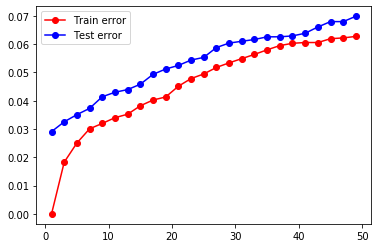

In [39]:
ran_k = range(1, 50, 2)
err_train_mas = []
err_test_mas = []
for k in ran_k:
    mod_k = KNeighborsClassifier(n_neighbors = k)
    mod_k.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_k.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_k.predict(X_test) != y_test))
plt.plot(ran_k, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_k, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### С ростом числа ближайших соседей ошибки начинают расти. Из графика видно, что лучший случай - случай с 1 ближайшим соседом. Ошибка на тесте близка к 3%. Это хороший показатель.

##### Посмотрим и другие методы:

# SVC

##### Метод опорных векторов:

In [87]:
from sklearn.svm import SVC
svc = SVC(gamma = 'scale')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.032109470261482184
ошибка на тестовой выборке: 0.04993678887484197


In [88]:
y_test_predict = svc.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 376   28    1   15    1    0]
 [   9 2216    3    8    0    0]
 [   6   12   99   18    0    0]
 [  15   15    6  266    0    0]
 [   3    4    0    0    7    0]
 [   1    3    0   10    0   42]]


### Подбор параметров

In [55]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma = 'scale')
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array}) #Подборка пар-ров
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("Меньшая ошибка " + str(best_cv_err))
print("Лучший параметр С " + str(best_C))

D:\work\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Меньшая ошибка 0.035632028180463404
Лучший параметр С 10.0


In [89]:
svc = SVC(C = best_C, gamma = 'scale').fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train)) #ошибка на обуч. выборке
err_test  = np.mean(y_test  != svc.predict(X_test)) #ошибка на тесте

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.00501287088470397
ошибка на тестовой выборке: 0.03603034134007586


In [90]:
y_test_predict = svc.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 393   10    2   13    3    0]
 [  13 2214    2    7    0    0]
 [   6    3  115   11    0    0]
 [   9   11    5  276    0    1]
 [   4    1    0    0    9    0]
 [   3    1    1    8    0   43]]


##### Отрисуем динамику изменения ошибок в зависимости от C:

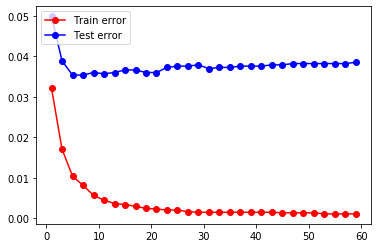

In [42]:
ran_C = range(1, 60, 2)
err_train_mas = []
err_test_mas = []
for c_cur in ran_C:
    mod_c = SVC(C = c_cur, gamma = 'scale')
    mod_c.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_c.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_c.predict(X_test) != y_test))
plt.plot(ran_C, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_C, err_test_mas,  'b-o', label = 'Test error')
plt.legend(loc = 2)

#### С ростом C ошибка на обучающей выборке стабильно падает, а на тесте начинает немного расти, что говорит нам о небольшое переобучении в случае постоянного роста С. Оптимальное значение С = 10, при этом ошибка на тесте составляет около 3.6%, что достаточно приемлимо.

# Random Forest

##### Использование случайного леса с 1000 деревьев:

In [91]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.0
ошибка на тестовой выборке: 0.0606826801517067


In [92]:
y_test_predict = rf.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 356   53    2   10    0    0]
 [   5 2221    4    6    0    0]
 [   5   22   93   15    0    0]
 [  21   20    4  255    0    2]
 [   2   10    0    0    2    0]
 [   2    4    1    4    0   45]]


### Значимость признаков

In [81]:
np.sum(rf.feature_importances_)

0.9999999999999999

##### Отображение значимости каждого признаки:

In [82]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'max_ndvi' (0.150661)
 2. feature '20140202_N' (0.086376)
 3. feature '20150125_N' (0.071121)
 4. feature '20150720_N' (0.060247)
 5. feature '20141016_N' (0.049728)
 6. feature '20150501_N' (0.039490)
 7. feature '20140610_N' (0.039142)
 8. feature '20140813_N' (0.036487)
 9. feature '20150517_N' (0.034732)
10. feature '20150602_N' (0.033527)
11. feature '20140423_N' (0.033501)
12. feature '20140626_N' (0.029317)
13. feature '20140930_N' (0.028046)
14. feature '20140509_N' (0.026119)
15. feature '20150330_N' (0.025846)
16. feature '20150226_N' (0.024941)
17. feature '20140101_N' (0.023832)
18. feature '20140117_N' (0.023356)
19. feature '20150415_N' (0.023207)
20. feature '20141117_N' (0.022145)
21. feature '20140407_N' (0.021180)
22. feature '20150210_N' (0.020164)
23. feature '20140218_N' (0.019846)
24. feature '20150314_N' (0.019516)
25. feature '20141101_N' (0.015287)
26. feature '20140322_N' (0.014417)
27. feature '20140525_N' (0.014060)
28. feature '

In [83]:
feature_names[[1,0,1]]

Index(['20150720_N', 'max_ndvi', '20150720_N'], dtype='object')

##### Гистограмма значимости:

(-1, 20)

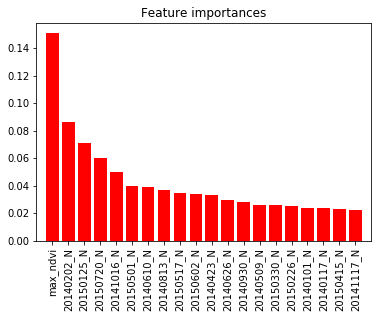

In [84]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

##### Отрисуем динамику изменения ошибок в зависимости от числа деревьев:

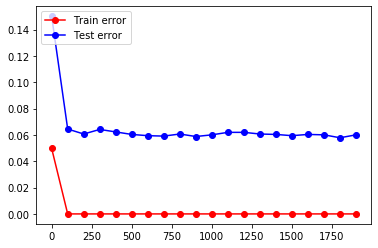

In [45]:
ran_tree = range(1, 2000, 100)
err_train_mas = []
err_test_mas = []
for t_cur in ran_tree:
    mod_t = ensemble.RandomForestClassifier(n_estimators = t_cur)
    mod_t.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
plt.plot(ran_tree, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_tree, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### С ростом числа деревьев происходит изменение ошибки на тесте в некотором диапазоне, т.е. переобучения нет. Ошибка на тесте колеблется в районе 6%.

# Extremely Randomized Trees

##### Еще одни рандомизированные деревья:

In [93]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.0
ошибка на тестовой выборке: 0.05467762326169406


In [94]:
y_test_predict = ert.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 362   49    1    9    0    0]
 [   5 2223    1    7    0    0]
 [   5   18  101   11    0    0]
 [  18   22    4  258    0    0]
 [   3    7    0    0    4    0]
 [   3    5    0    5    0   43]]


##### Отрисуем динамику изменения ошибок в зависимости от числа деревьев:

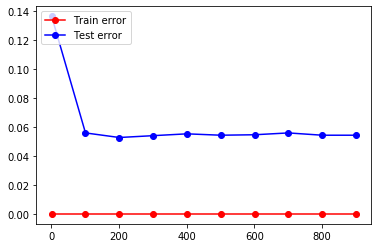

In [47]:
ran_tree = range(1, 1000, 100)
err_train_mas = []
err_test_mas = []
for t_cur in ran_tree:
    mod_t = ensemble.ExtraTreesClassifier(n_estimators = t_cur)
    mod_t.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
plt.plot(ran_tree, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_tree, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### Аналогично, как и в случае выше с ростом числа деревьев происходит изменение ошибки на тесте в некотором диапазоне, т.е. переобучения нет. Ошибка на тесте колеблется в районе 5-6%.

# AdaBoost

##### Использование простейшего алгоритма бустинга с числом деревьев равным 10:

In [48]:
ada = ensemble.AdaBoostClassifier(n_estimators = 10)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.18086980083999457
ошибка на тестовой выборке: 0.19152970922882429


In [95]:
y_test_predict = ada.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 145  233   36    6    0    1]
 [  96 2102   33    5    0    0]
 [  18   34   72   11    0    0]
 [  36   14   25  214    0   13]
 [   4   10    0    0    0    0]
 [   3    3    1   24    0   25]]


##### Отрисуем динамику изменения ошибок в зависимости от числа деревьев:

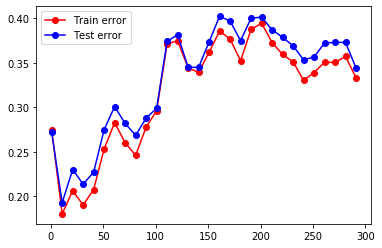

In [50]:
ran_tree = range(1, 300, 10)
err_train_mas = []
err_test_mas = []
for t_cur in ran_tree:
    mod_t = ensemble.AdaBoostClassifier(n_estimators = t_cur)
    mod_t.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
plt.plot(ran_tree, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_tree, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### Ошибки достаточно высоки. Минимально полученные ошибки на тесте - 19-20%.

# GBT

###### Градиентный бустинг:

In [61]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.0
ошибка на тестовой выборке: 0.05088495575221239


In [96]:
y_test_predict = gbt.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[ 381   29    0    9    0    2]
 [  11 2208    4   10    3    0]
 [   6   12  101   15    1    0]
 [  14   12    5  268    0    3]
 [   2   10    0    0    2    0]
 [   2    2    1    8    0   43]]


##### Отрисуем динамику изменения ошибок в зависимости от числа деревьев:

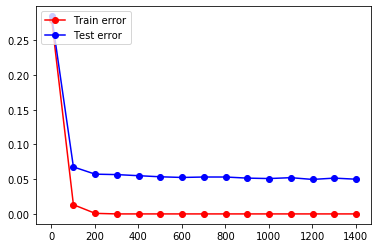

In [62]:
ran_tree = range(1, 1500, 100)
err_train_mas = []
err_test_mas = []
for t_cur in ran_tree:
    mod_t = ensemble.GradientBoostingClassifier(n_estimators = t_cur)
    mod_t.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
plt.plot(ran_tree, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_tree, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### Ошибка на тесте находится в некотором диапазоне, переобучения нет. Ошибка на тесте колеблется около значения в 5%.

# PCA

##### Используем PCA и сокращаем размерность признаков до 2

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)

###### Печатаем результат

In [21]:
X_PCA

array([[ 8.63142642,  4.90973732],
       [ 8.51642338,  4.82403911],
       [ 5.34580498,  2.18392073],
       ...,
       [ 2.81275677,  1.71609398],
       [ 4.05276647,  3.09993419],
       [-0.7846311 , -0.81115995]])

##### Изобразим точки

Text(0.5, 1.0, '2 components after PCA')

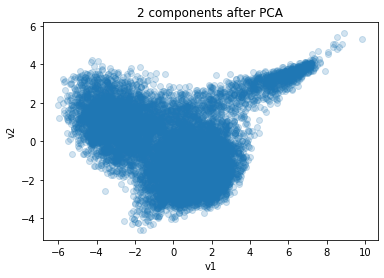

In [20]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha = .2)

plt.xlabel('v1')
plt.ylabel('v2')
plt.title('2 components after PCA')

##### Применяем kNN (в нашем случае оптимальное значение соседей было равно 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7381 3164


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("ошибка на обучающей выборке: " + str(err_train)) 
print("ошибка на тестовой выборке: " + str(err_test))

ошибка на обучающей выборке: 0.0
ошибка на тестовой выборке: 0.2474715549936789


#### График зависимости от главных компонент

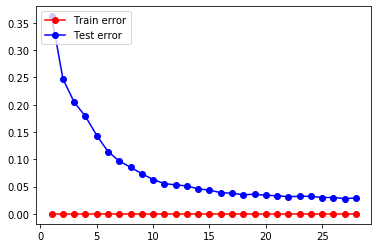

In [24]:
comp = range(1, 29, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

#### Из графиков видно, что чем больше количество главных направлений, тем ошибка меньше. Но стоит отметить, что величина ошибки не слишком сильно отличается при использовании от 22 и более компонент. Величина ошибки в лучшем случае колеблется около 3%. В нашем случае PCA не позволил сильно уменьшить ошибку. Лучшее значение для компонент PCA, дающее минимум ошибки = 27. Далее выведем все значения ошибок на тесте, чтобы увидеть что лучшее значение действительно достигается при n_components = 27.

In [29]:
for i in range(28):
    print("Число компонент: " , i + 1, "Значение ошибки на тестовой выборке: " , err_test_mas[i])

Число компонент:  1 Значение ошибки на тестовой выборке:  0.36188369152970923
Число компонент:  2 Значение ошибки на тестовой выборке:  0.24715549936788875
Число компонент:  3 Значение ошибки на тестовой выборке:  0.20448798988621997
Число компонент:  4 Значение ошибки на тестовой выборке:  0.17857142857142858
Число компонент:  5 Значение ошибки на тестовой выборке:  0.14348925410872312
Число компонент:  6 Значение ошибки на тестовой выборке:  0.1140960809102402
Число компонент:  7 Значение ошибки на тестовой выборке:  0.09671302149178256
Число компонент:  8 Значение ошибки на тестовой выборке:  0.08533501896333755
Число компонент:  9 Значение ошибки на тестовой выборке:  0.0736409608091024
Число компонент:  10 Значение ошибки на тестовой выборке:  0.06289506953223767
Число компонент:  11 Значение ошибки на тестовой выборке:  0.05562579013906448
Число компонент:  12 Значение ошибки на тестовой выборке:  0.05309734513274336
Число компонент:  13 Значение ошибки на тестовой выборке:  0.05

#### Тут видно что последние значения ошибки отличаются незначительно. Действительно минимальная ошибка на тесте достигается при 27 компонентах. Значение ошибки: 0.028128950695322376, т.е. ~ 2.8%.